# Phase 3 Project:

Student Name: **Paul Kamau**

DSF-ft06



# Project Overview
***SyriaTel Customer Churn***

The project strategically harnesses data analytics and machine learning to augment customer experiences and reduce churn for Syriatel, a leading telecommunications provider in Syria. In an intensely competitive market, Syriatel's sustained growth hinges on customer retention and satisfaction. 

# Business Understanding
#### 1.1 Introduction to Syriatel
Syriatel is a mobile network provider in Syria that was founded in 2000. It is one of the two dominant providers in the country, along with MTN Syria. Syriatel offers LTE, 3G, and GSM services to its customers, under the brand name Super Surf. The company is owned by Rami Makhlouf, a cousin of Syrian president Bashar al-Assad, and has about 3,500 employees and 8 million subscribers. Syriatel is headquartered in Damascus and operates in all Syrian governorates. However, the company has faced several challenges in recent years, such as the European Union sanctions, the Syrian civil war, and the judicial custody order issued by a Syrian court in 2020. Syriatel is also facing competition from a new entrant, Wafa Telecom, which received the third telecom license in Syria in 2022. Syriatel faces the imperative challenge of evolving and enhancing its services. This evolution is crucial to maintain its competitive edge and continue providing exceptional customer experiences in a rapidly changing market.

#### 1.2 Key Stakeholders
My stakeholders are: (1) Executives, (2) Customer Retention Team, and (3) Potential Investors and Partners of  'SyriaTel' where I'm a lead datascientist The project's success is deeply connected to meeting the needs and expectations of a varied group of stakeholders, each with distinct interests and objectives:

##### A.	Syriatel:
1. **Syriatel Executives**: The company's leadership is focused on sustaining and growing the customer base. Their strategic objectives encompass ensuring the long-term prosperity and market dominance of Syriatel, amidst increasing competition and evolving market demands.


2. **Syriatel Customer Retention Team**: Tasked with bolstering customer acquisition and retention, the marketing department is keen on enhancing customer engagement. They are responsible for devising and implementing targeted promotional campaigns and strategies to attract and retain customers.

##### B.	Potential Investors and Partners: 
While not directly involved in day-to-day operations, investors and business partners have a vested interest in Syriatel's market performance and strategic direction. Their support and investment are essential for funding new initiatives and driving technological advancements.

# Business Problem
We lack the ability to identify customers when they're on the cusp of churning (**Churn ~ loss of customers to competition**). The objective of this project is to predict likely churners. Our dataset includes 20 variables describing over 3,000 current and churned customers. Achieving this predictive ability will allow us to examine the data on a rolling basis and quickly implement targeted incentivization.

### Objectives
The project is aligned with the following key objectives:

1. **Churn Prediction and Mitigation**:

    1. Train, test, and evaluate advanced classification models to accurately predict customer churn.
    2. Leverage predictive insights to identify customers at risk of churn, facilitating proactive retention strategies.
    3. Use model outputs to develop targeted interventions, mitigating churn and enhancing customer loyalty.

2.	**Customer Experience Enhancement**:

    1. Utilize insights derived from machine learning models to understand customer needs and preferences.

    2. Implement data-driven recommendations to improve customer satisfaction, such as personalized services and prompt issue resolution.
    3. Ensure high network performance and service quality, fostering a positive and consistent customer experience.

3.	**Strategic Business Decision Making**:
    1. Apply the findings from the final model to inform and support key business decisions.

    2. Develop and execute strategies that not only retain existing customers but also attract new ones, strengthening Syriatel’s market position.
    3. Craft innovative solutions and services based on customer data insights, ensuring Syriatel remains competitive and responsive to market dynamics.

By focusing on these objectives, the project aims to empower Syriatel with actionable data-driven insights, reinforcing its market presence and customer-centric approach. The integration of machine learning into business strategies is envisioned to transform customer interactions and decision-making processes, setting new standards for excellence in the telecommunications industry.


# Data understanding

Sourced from: 

   - [Kaggle: Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/)

## Dataset Overview

This dataset encompasses records of 3,333 clients from a fictional telecommunications company named "SyriaTel." It includes 20 different attributes, capturing details such as customer geographic locations, usage patterns for day, evening, and night calls, the presence of voice mail or international plans, and the length of the account number. Notably, the account number's length serves as an indicator of the duration of a customer's association with SyriaTel, making it a useful measure of the customer's lifetime value.

### Variable Descriptions

1. **Churn**: Indicates if the customer has stopped doing business with SyriaTel. (False = No churn, True = Churned)

2. **State**: The U.S. State of the customer. (Requires one-hot encoding; not ordinal)

3. **Account Length**: A smaller number signifies an older account. (Indicative of Customer Lifetime Value)

4. **Area Code**: Area code of the customer's phone number.

5. **Phone Number**: The customer's phone number.

6. **International Plan**: Whether the customer has an international plan. ('yes' or 'no'; binary and thus effectively one-hot encoded)

7. **Voice Mail Plan**: Whether the customer subscribes to a voice mail plan. ('yes' or 'no'; as above)

8. **Number of Voice Mail Messages**: Total number of voice mail messages left by the customer.

9. **Total Day Minutes**: Aggregate of daytime minutes used.

10. **Total Day Calls**: Total number of calls made during the day.

11. **Total Day Charge**: Total charges incurred for daytime calls.

12. **Total Eve Minutes**: Total minutes spent on calls in the evening.

13. **Total Eve Calls**: Number of calls made during the evening.

14. **Total Eve Charge**: Charges for evening calls.

15. **Total Night Minutes**: Total minutes for nighttime calls.

16. **Total Night Calls**: Number of calls made at night.

17. **Total Night Charge**: Nighttime call charges.

19. **Total Intl Minutes**: Cumulative international minutes (covering day, evening, and night).

20. **Total Intl Calls**: Total number of international calls (across all time periods).

21. **Total Intl Charge**: Total charges for international calls.

22. **Customer Service Calls**: Number of calls made to customer service by the customer.


### Target Variable Desription:
22. **Churn**: if the customer has churned (true or false)


# Data Preparation and EDA 

In [1]:
# Importing Required Python Libraries:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, GridSearchCV

from sklearn.metrics import log_loss

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

# Hiding warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore',module='sklearn')

In [2]:
# import the data-set
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# print the first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Preview all columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Analysis of Data Types in the Dataset**

The examination of our dataset's structure revealed the following distribution of data types:

| Data Type   | Quantity |
|:------------|----------|
| Boolean     | 1        |
| Float64     | 8        |
| Integer64   | 8        |
| String      | 4        |

An important observation is that each column uniformly contains **3,333 entries**. This uniformity suggests a potential absence of missing values in the dataset.


## Univariate Analysis

My exploration commences with a detailed univariate analysis, scrutinizing each variable in isolation to gauge its individual characteristics and distribution. This foundational step is critical for establishing a baseline understanding of the dataset's intrinsic properties, essential for informed hypothesis formulation and subsequent multivariate analyses.

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


I segment the dataset into numerical and categorical variables, enabling a tailored approach to performing Exploratory Data Analysis (EDA) on each group. This distinction allows for more precise and appropriate statistical methods to be applied, enhancing the accuracy and relevance of our insights.

In this dataset, I distinguish between numerical and categorical variables for visualization purposes.
Firstly, I identify numerical variables by selecting columns with data types 'int64' and 'float64'. However, it's important to note that 'area code', despite being an integer, is functionally a categorical variable. Therefore, we exclude it from our numerical variable list.

Next, I incorporate 'area code' into our list of categorical variables, which also includes columns of types 'object' and 'bool'. This categorization ensures that each variable is analyzed using the most suitable visualization techniques, reflecting its true nature and enhancing the clarity of my findings.

In [5]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns  

# removing area code from the numerical variables
numerical_vars = [col for col in numerical_vars if col != 'area code']

# adding 'area code' into the categorical variables
categorical_vars = list(df.select_dtypes(include=['object', 'bool']).columns )+ ['area code']

print("The Numerical Variables are:", numerical_vars)
print("\n")
print("The Categorical Variables are:", categorical_vars)

The Numerical Variables are: ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


The Categorical Variables are: ['state', 'phone number', 'international plan', 'voice mail plan', 'churn ', 'area code']


Now lets move on to visualize the information above. I will create various subplots for boxplots

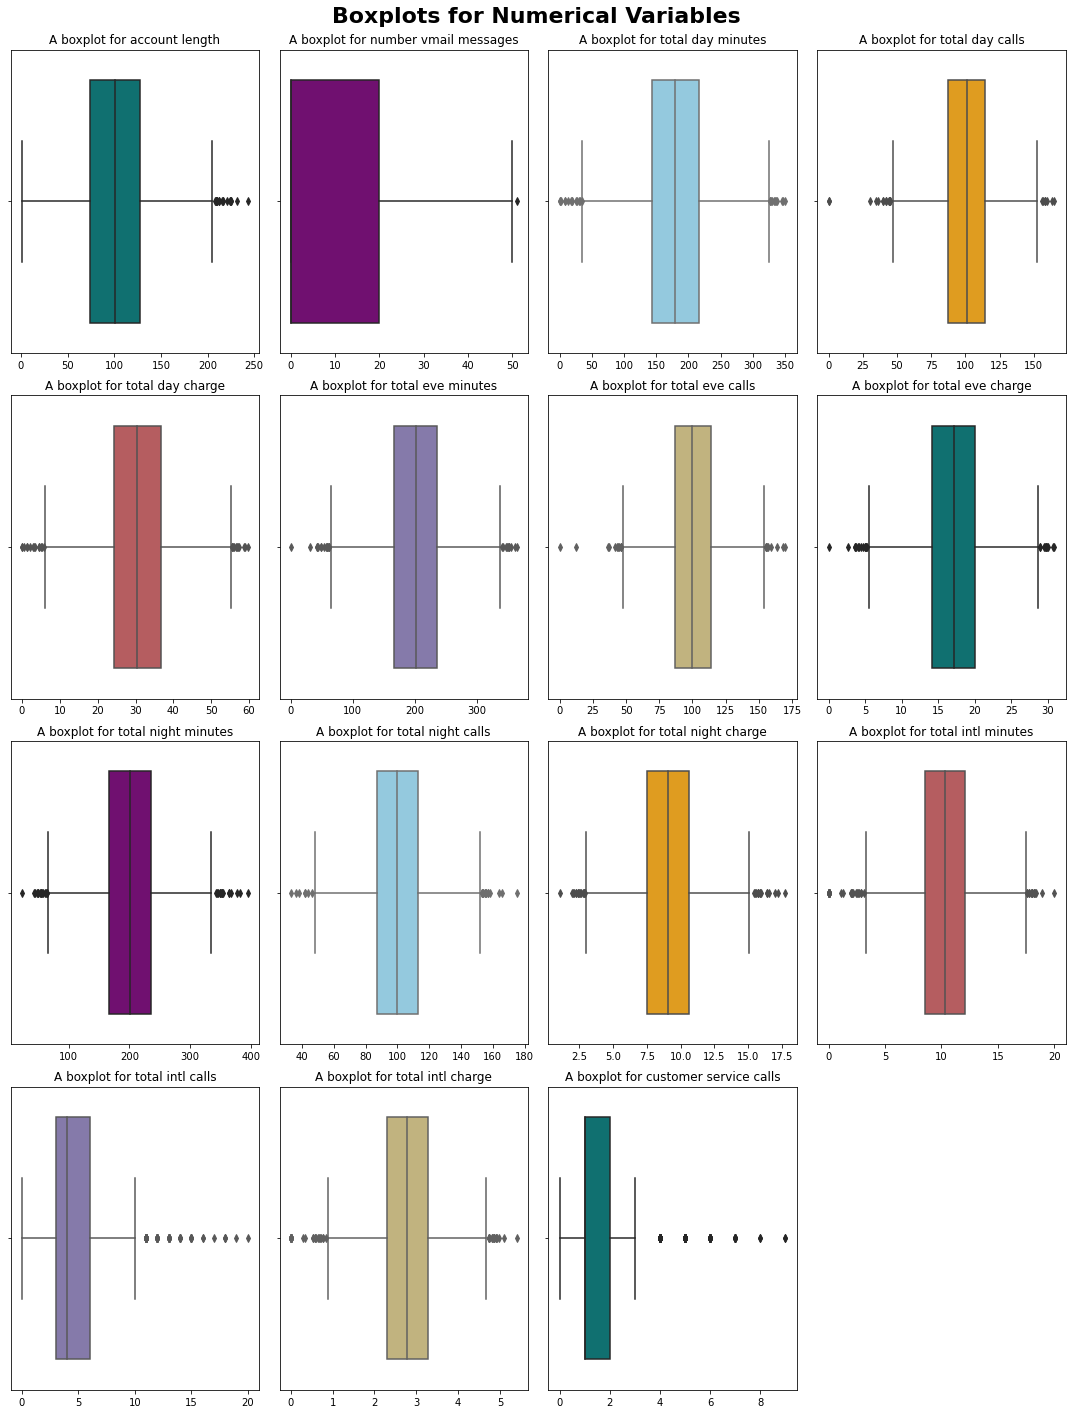

In [6]:
plt.figure(figsize=(15, 20))  # Adjusted figure size to fit better on the screen

boxplot_colors = ["teal","purple", "skyblue", "orange", "#C44E52", "#8172B2", "#CCB974"]

for i, var in enumerate(numerical_vars):
    plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.boxplot(x=df[var], color=boxplot_colors[i % len(boxplot_colors)])  # Plotting boxplot and cycling through colors
    plt.title(f'A boxplot for {var}')
    plt.xlabel('')  # Keeping x-axis label empty
    plt.ylabel('')  # Keeping y-axis label empty
    plt.tight_layout()  # Adjusting layout for each subplot

plt.rcParams["figure.dpi"] = 150  # Adjusted DPI for better on-screen fit
plt.suptitle('Boxplots for Numerical Variables\n', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95)  # Adjusting spacing for title
plt.show()

The analysis of the numerical variables provides insightful observations:

1. **Account Length**: A notable presence of outliers indicates that a few accounts have unusually long durations.

2. **Number Vmail Messages**: While the majority of customers tend to have a minimal number of voicemail messages, a small group stands out with a considerably higher frequency of messages.

3. **Total Day Calls**: The data shows a few exceptional cases with extremely low or high numbers of daily calls, deviating from the common trend.

4. **Total Intl Minutes**: While shorter international calls are common among most customers, there exists a distinct segment making significantly longer calls.

5. **Total Intl Calls**: Generally, customers make a limited number of international calls, but there are exceptions where this number is notably higher.

6. **Customer Service Calls**: While the trend leans towards one or two service calls per customer, there are exceptions with an unusually high number of service calls.

7. **Total Day Charge**: The distribution appears tightly grouped, suggesting that day charges are fairly consistent among customers, with a few exceptions on the higher end.

8. **Total Eve Minutes and Charges**: There's a moderate spread in the evening minutes and charges with a small number of outliers, indicating that while most customers have similar usage patterns in the evening, a few have significantly higher usage.

9. **Total Night Minutes and Calls**: The spread is quite similar to that of evening usage, but with fewer outliers, which could suggest more uniform behavior in nighttime usage among customers.

10. **Total Intl Calls and Charges**: The international calls and charges show a relatively tight distribution, yet there are outliers on both the lower and upper ends, highlighting that international communication is not uniform across customers.

11. **Customer Service Calls**: This variable shows a right-skewed distribution, with most customers needing only a few service calls, but there's a noticeable amount of customers with many more calls than average, which could indicate issues or high engagement with customer service.

12. **Total Night Charge**: Similar to the night minutes, the charges are also consistently distributed with a few customers experiencing higher charges, which may correspond to the outliers observed in the night minutes.
    

These patterns highlight diverse customer behaviors, particularly in terms of the length of account ownership, voicemail usage, call frequencies, duration of international calls, and frequency of service calls. This diversity suggests a varied customer base with specific needs and usage patterns.The observations can provide valuable insights into customer behavior, especially in terms of their interaction with different services at different times of the day and their need for customer support. Patterns in outliers could be indicative of specific customer segments with unique needs or usage behaviors that could be targeted with tailored marketing or service strategies.

### Data Spread Overview:

To gain insight into our dataset, we'll examine the dispersion/distribution of our data points.

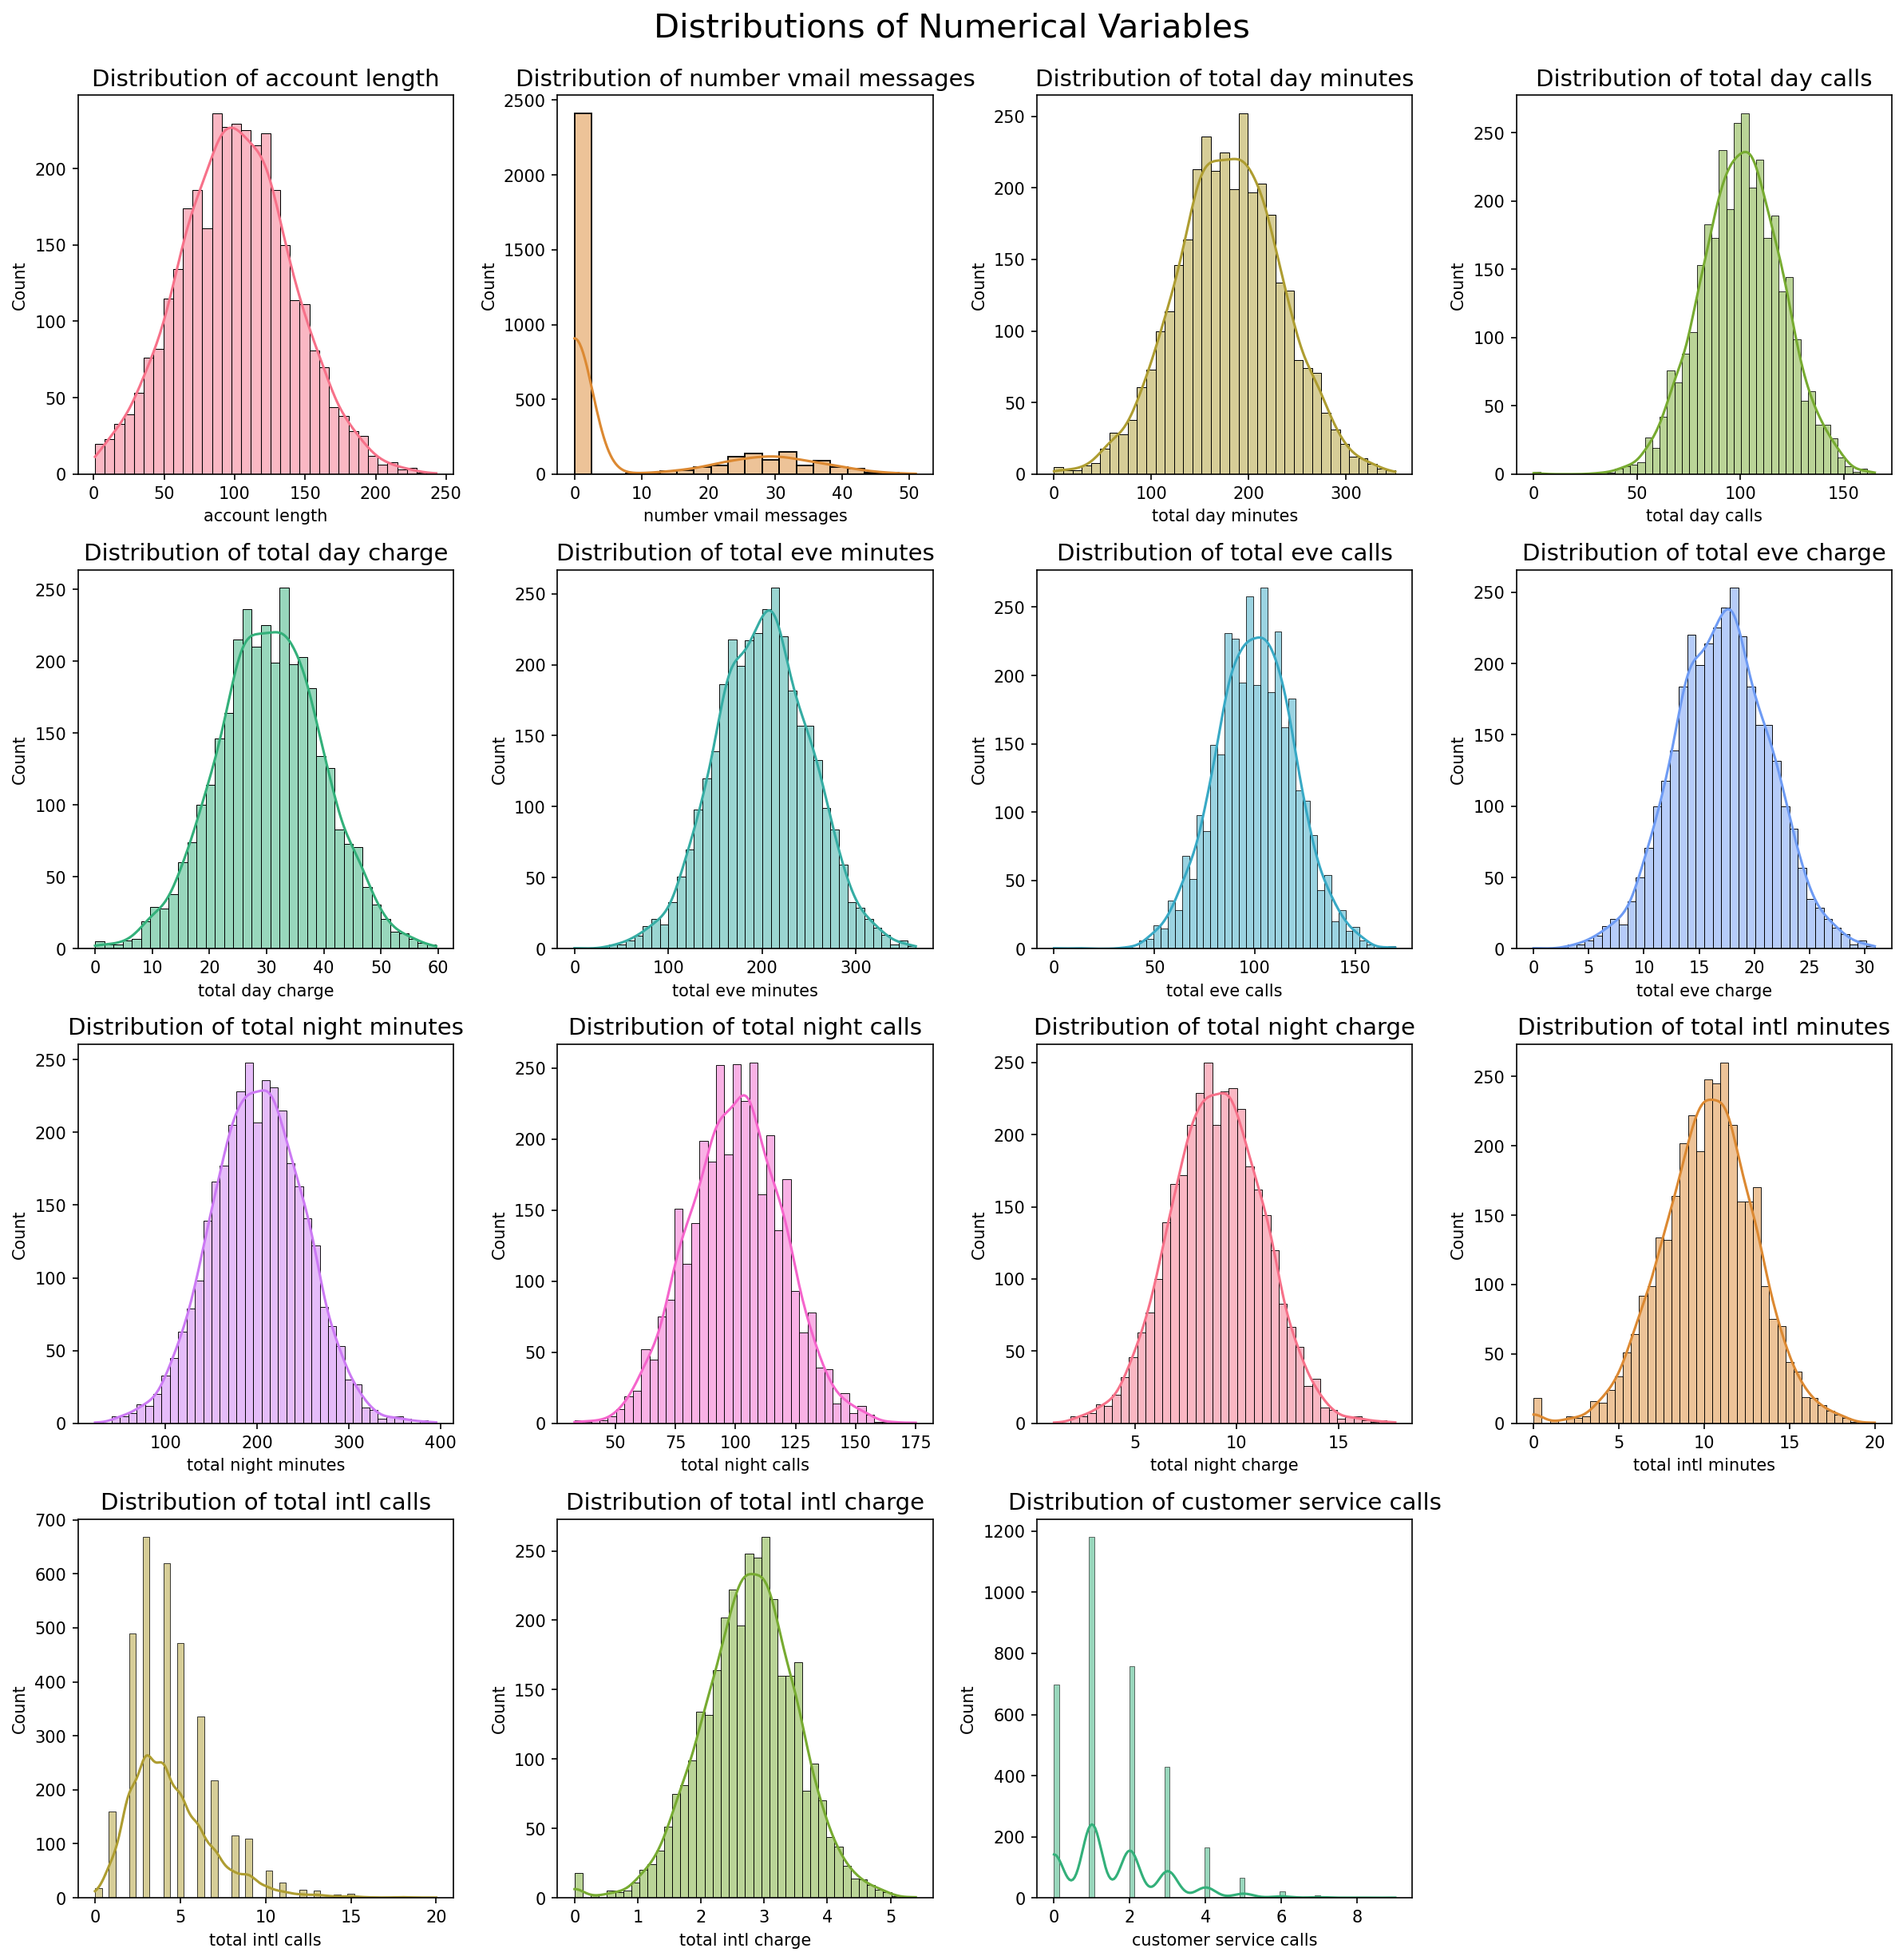

In [7]:
# Define the dimensions for the subplot grid
num_rows = 4
num_cols = 4

# Initialize the subplot grid with specified size for better visibility
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Iterate over the list of numerical variables to create a distribution plot for each
for i, col in enumerate(numerical_vars):
    if i < len(numerical_vars):  # Check to avoid index out of range for the axes array
        # Create a distribution plot with Kernel Density Estimate (KDE)
        sns.histplot(df[col], kde=True, ax=axes[i], color=sns.color_palette("husl", 10)[i%10])  # Cycle through HUSL color palette
        # Set the title with a formatted string for consistency and readability
        axes[i].set_title(f'Distribution of {col}', fontsize=14)

# Remove any unused subplots from the grid to avoid blank spaces
for i in range(len(numerical_vars), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust the layout of the subplots for a neat and organized look
plt.tight_layout()

# Add an overarching title to the figure
plt.suptitle('Distributions of Numerical Variables', fontsize=20, y=1.02)

# Display the resulting plots
plt.show()


### Data Profile Interpretation:

The visualizations clearly demonstrate varying scales across the dataset, an insight that will be valuable when we approach the modeling phase. The majority of the variables are on a continuous spectrum, with the exception of customer service calls and total intl calls, which are discrete.
While many variables show a bell-shaped curve indicative of normal distribution, there are notable exceptions. Variables such as **customer service calls**, **total intl calls**, and **number of voicemail messages** exhibit positive skewness. This characteristic will be explored further in the subsequent analytical section. Besides, the histograms for **customer service calls** and **total intl calls** show discrete bars separated by gaps, which is typical for discrete data. The distribution of **number of voicemail messages** is concentrated at the lower end, confirming the positive skew. The scales of the x-axes differ significantly, reinforcing the need for normalization or standardization before modeling to ensure each variable contributes proportionately to the analysis.

## Assessing Asymmetry and Tailedness in Data Distribution

In the exploration of our dataset, a key aspect to consider is the **skewness and kurtosis**, which provide insights into the asymmetry and the propensity of data to produce outliers, respectively. **Skewness** measures the degree to which a distribution leans towards the left or right, indicating the direction and relative strength of a dataset's tail. On the other hand, **kurtosis** quantifies the sharpness of the peak of a distribution and the thickness of its tails. Distributions with high kurtosis tend to have heavy tails and a sharp peak, often leading to more outliers. Understanding these two measures helps us in identifying the normality of variables, potential data transformation needs, and the suitability of statistical methods for our analysis.

In [8]:
from scipy.stats import skew, kurtosis

# skewness and kurtosis for numerical columns calculation
skewness_values = df[numerical_vars].apply(skew)
kurtosis_values = df[numerical_vars].apply(kurtosis)

# Creattion of a DataFrame to store the results
skew_kurtosis_df = pd.DataFrame({'Skewness': skewness_values, 'Kurtosis': kurtosis_values})

skew_kurtosis_df

,Skewness,Kurtosis
account length,0.096563,-0.109474
number vmail messages,1.264254,-0.052852
total day minutes,-0.029064,-0.021710
total day calls,-0.111736,0.241017
total day charge,-0.029070,-0.021582
total eve minutes,-0.023867,0.023792
total eve calls,-0.055538,0.204048
total eve charge,-0.023847,0.023650
total night minutes,0.008917,0.083888
total night calls,0.032485,-0.073711


### Insights and Analysis of Numerical Variables’ Distributions:

Evaluating the outputs and graphical representations of our numerical data, we can observe that while the majority of the variables exhibit a pattern close to normal distribution, certain variables stand out with distinct distribution features:

1. **Voice Mail Messages**: Exhibiting a skewness value significantly above 1, this variable displays a pronounced right-skewed trend. This indicates that the bulk of our customers engage with voice mail minimally, yet there exists a subset that receives an unusually high volume of messages, which explains the rightward tail and platykurtic nature (flatter peak) of this distribution.

2. **Total Intl Calls**: With a kurtosis value that exceeds 3 by a considerable margin, this variable presents a leptokurtic distribution, suggesting a concentration of data around the mean with fat tails. This pattern reveals that while most customers make only a handful of international calls, there are notable exceptions who frequently engage in international communication, resulting in a distribution that is both right-skewed and heavy-tailed.

3. **Customer Service Calls**: Also manifesting a kurtosis value above 3, this indicates a distribution with more pronounced tails compared to a normal distribution. It suggests that, despite most customers only occasionally reaching out to customer service, there is a segment that does so quite frequently, leading to a right-skewed and leptokurtic distribution.

These characteristics imply that certain customer behaviors are more varied than others, with extremes in behavior more common in the usage of services such as voice mail and international calling. Such insights can be invaluable for identifying unique customer needs and tailoring services accordingly. Furthermore, the skewness and kurtosis values guide us in considering data normalization or transformation techniques to prepare for accurate modeling and analysis.

## Exploration of Categorical Variables:

Lets now delve into the categorical aspects of our dataset

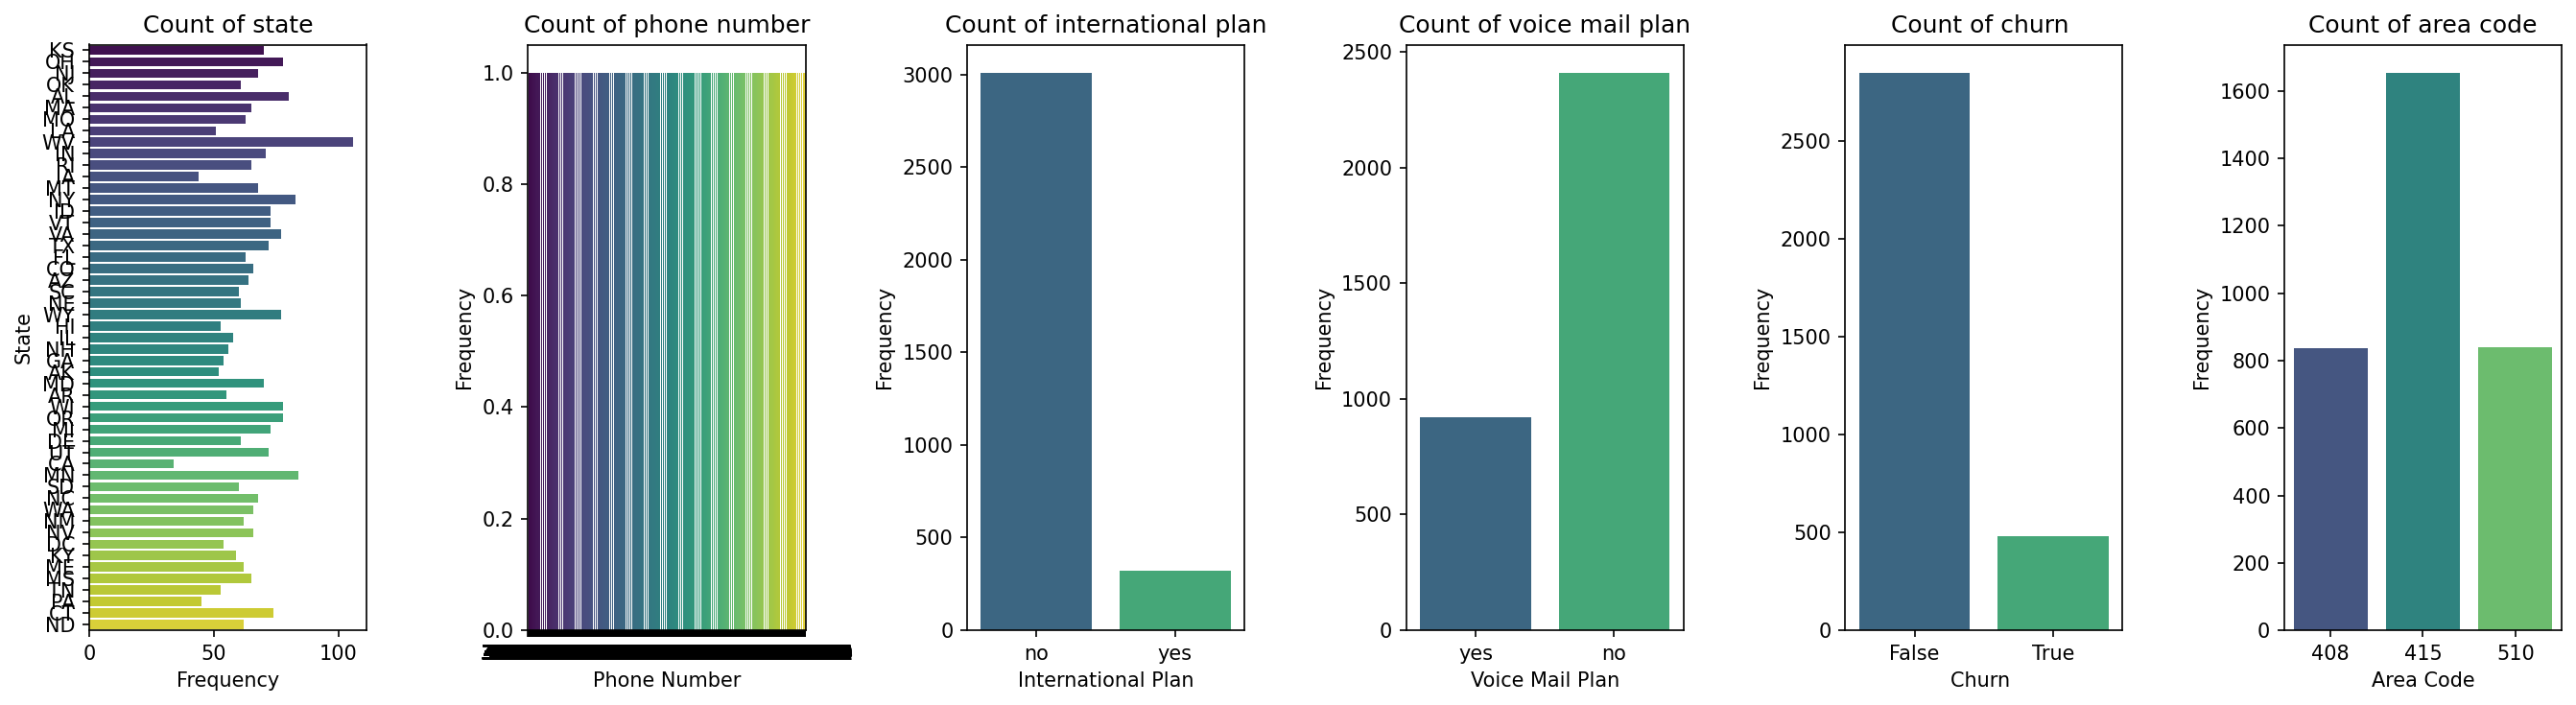

In [9]:

# Exclude phone number from the categorical variables list
categorical_vars = [var for var in categorical_vars if var != 'phone_number']

# Create subplots for countplots
fig, axes = plt.subplots(ncols=len(categorical_vars), figsize=(18, 5))

# Creating countplots for each categorical variable, excluding 'phone_number'
for i, var in enumerate(categorical_vars):
    if var == 'state':
        # For state, use a horizontal bar plot to avoid cluttered x-axis labels
        sns.countplot(data=df, y=var, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Count of {var}', fontsize=12)
        axes[i].set_xlabel('Frequency', fontsize=10)
        axes[i].set_ylabel(var.title(), fontsize=10)
    else:
        sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Count of {var}', fontsize=12)
        axes[i].set_xlabel(var.title(), fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
        # Rotate the x-axis labels if the variable is 'area_code' to avoid overlap
        if var == 'area_code':
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn '],
      dtype='object')


In [11]:
# geopandas


In [12]:
# MAPS ###

The countplots and data output provide valuable insights into the categorical attributes of our dataset:
- Our dataset encompasses a comprehensive representation from **51 states** and includes records from **three distinct area codes**.
- Individual customer records are uniquely identified by their respective **phone numbers**.
- Customers in the dataset exhibit binary subscription status with respect to additional services: they are either enrolled in a **voice mail plan** or they are not.
- Similarly, customers' subscriptions to **international plans** follow a binary distribution, indicating whether they have opted for this service or have foregone it.

## Bi-Variate Relationship Exploration

We will now explore the inter-relationships between variables in our dataset to understand how they interact with one another.

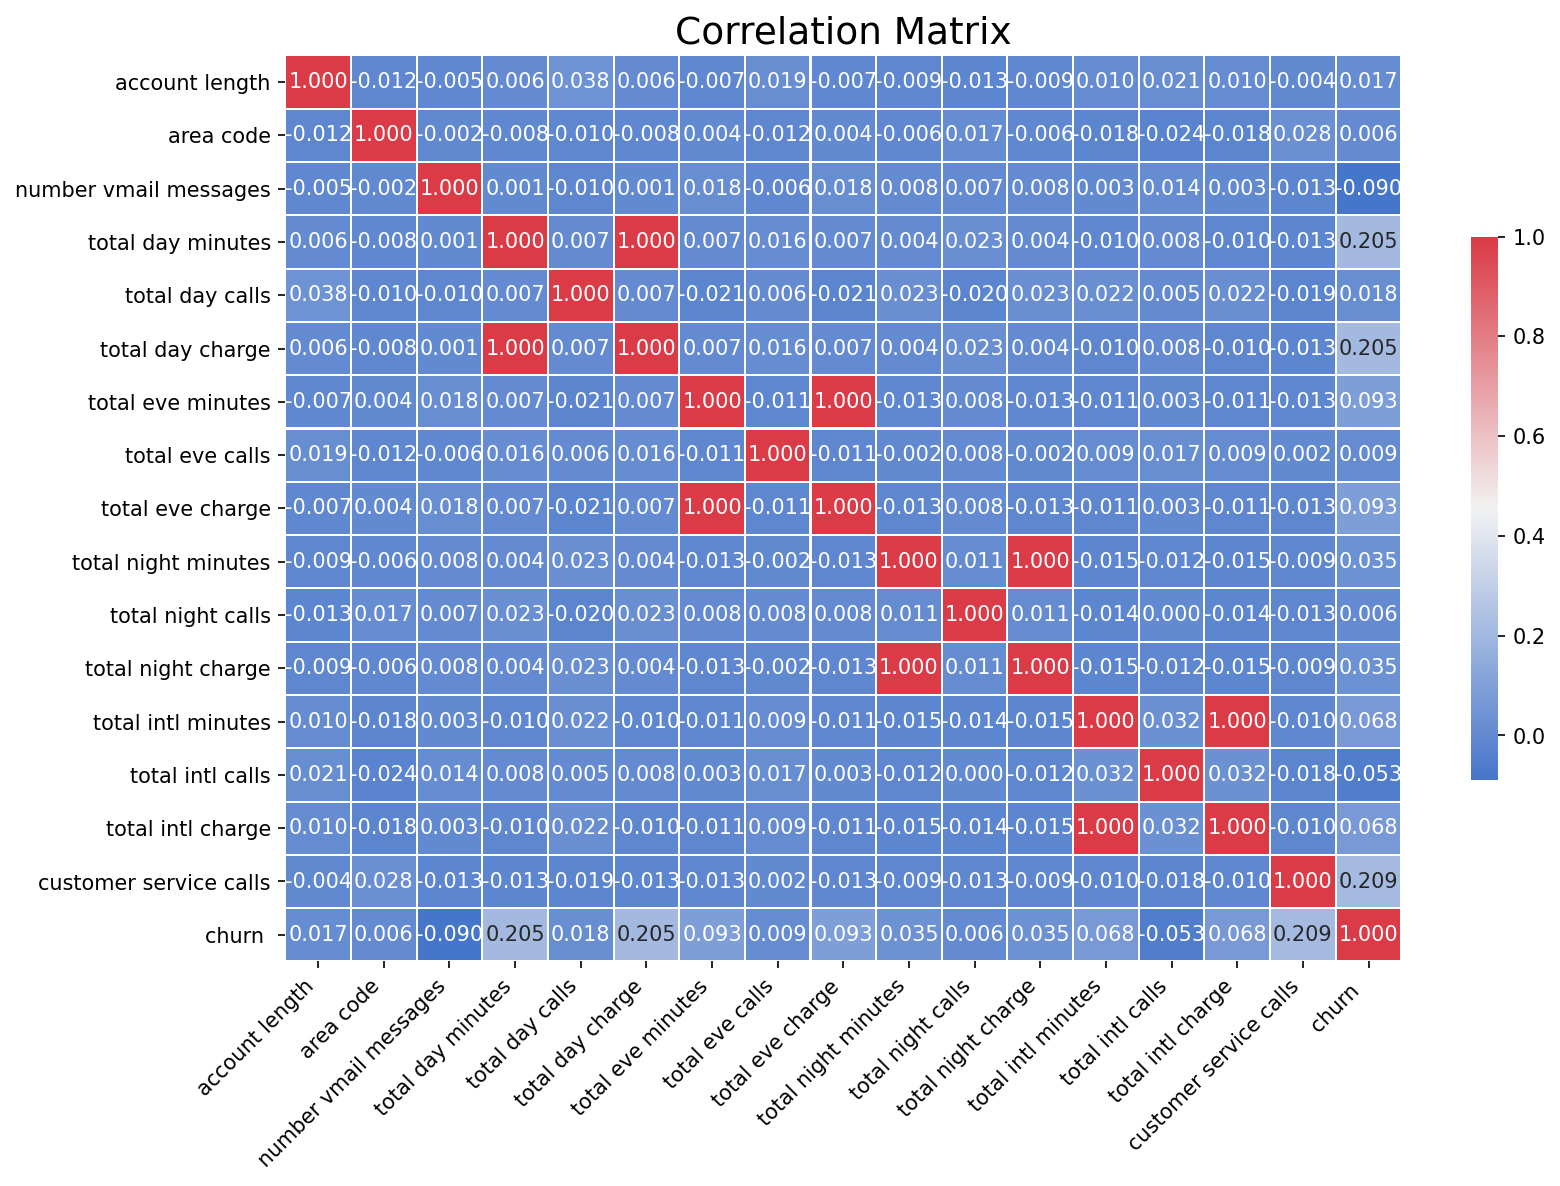

In [13]:
# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(12, 8)) 
correlation_matrix = df.corr()
cmap = sns.diverging_palette(255, 10, as_cmap=True)  
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, ax=ax, 
            linewidths=.5, fmt=".3f", cbar_kws={"shrink": .6})  

plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.yticks(rotation=0)  # Keep the y labels horizontal
ax.set_title("Correlation Matrix", size=18)
plt.show()

The heatmap vividly illustrates the interdependencies among various variables, identifying several pairs that exhibit a high degree of correlation outside of the principal diagonal (which inherently shows a perfect correlation for each variable with itself). Such strong correlations suggest the potential for multicollinearity, a condition where predictor variables are interrelated in a regression model, which can impede the ability to distinguish individual effects on dependent variables. To ensure the robustness and accuracy of our predictive modeling, it is crucial to address multicollinearity. This will be methodically approached in the data preparation phase, specifically in a segment dedicated to examining and mitigating multicollinearity, ensuring that our model remains reliable and valid.

## 3. Data Preparation

The data preparation phase is a critical step in our analytical journey, laying the groundwork for effective modeling. We will tackle various tasks to polish our dataset, enhancing its quality and ensuring its compatibility with the algorithms we plan to employ. The following are the pivotal actions we will undertake:

- **Data Type Integrity:**
   - It's imperative to verify the data type of each variable, converting any mislabeled numerical variables that are encoded as strings to their correct format to facilitate accurate analysis.

- **Missing Values Strategy:**
   - A thorough examination will be conducted to detect missing data. Subsequent measures will include appropriate techniques such as imputation, which could involve statistical methods like mean or median substitution, or more complex methods like model-based imputation, depending on the context and significance of the variable.

- **Duplicate Records:**
    - We will scrutinize the dataset for any duplicate entries and remove them to prevent skewing our analysis, ensuring the uniqueness of each data point.

- **Categorical Variables Transformation:**
    - For categorical attributes, such as "International Plan" and "Voice Mail Plan," we will apply one-hot encoding to transform them into a binary numerical representation, thereby making the data digestible for machine learning algorithms that require numerical input.

- **Multicollinearity Resolution:**
   - A critical review of the variables will be carried out to identify multicollinearity, ensuring that our model's performance and interpretability are not compromised. We will apply methods such as Variance Inflation Factor (VIF) analysis to pinpoint redundant predictors and consider dimensionality reduction techniques or feature selection to mitigate their effects.

Incorporating these steps will not only refine the dataset but also enhance the subsequent modeling phase, positioning us to derive more accurate and meaningful insights from our analysis.

In [14]:
# 1. Handling Missing Values:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As it seems, the output indicates that the dataset is complete, with all columns fully populated and devoid of any missing values.

In [15]:
# converting area code data into strings:
df['area code'] = df['area code'].astype(str)

In [16]:
# Handling Duplicates:
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)


In [17]:
# Set correlation threshold as parameter
threshold = 0.7  

# Calculate correlation matrix
correlation_matrix = df.corr()

highly_correlated_pairs = [] 

# Identify highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation = correlation_matrix.iloc[i, j]
        
        if abs(correlation) > threshold:
            var1 = correlation_matrix.columns[i]  
            var2 = correlation_matrix.columns[j]
            
            highly_correlated_pairs.append((var1, var2, correlation))
            
# Print and sort highly correlated pairs   
print(f"Variable Pairs Highly Correlated Above {threshold}:")
for x, y, z in sorted(highly_correlated_pairs, key=lambda row: abs(row[2]), reverse=True):
    print(f"{x} & {y} -> {z}")

Variable Pairs Highly Correlated Above 0.7:
total day charge & total day minutes -> 0.999999952190397
total eve charge & total eve minutes -> 0.9999997760198517
total night charge & total night minutes -> 0.99999921487588
total intl charge & total intl minutes -> 0.9999927417510258


The examination of the dataset has revealed significant multicollinearity, particularly among the pairs 'total day charge' & 'total day minutes', 'total eve charge' & 'total eve minutes', 'total night charge' & 'total night minutes', and 'total intl charge' & 'total intl minutes', each showing a correlation coefficient very close to 1.

To mitigate the impact of multicollinearity on our predictive model, we will remove one variable from each correlated pair for the following justifications:

1. **Model Interpretability**: A simpler model with fewer variables is easier to interpret. Simplification by removing redundancies enhances the clarity of the model, particularly for an audience without a deep technical background.

1. **Multicollinearity Concerns**: The presence of highly inter-correlated predictors can obscure the individual effect of each variable, leading to unstable coefficient estimates in our model.

3. **Overfitting Avoidance**: Excessively correlated variables may lead to overfitting, where the model performs well on training data but poorly on unseen data. Pruning correlated variables enhances the generalizability and robustness of the model.

3. **Computational Efficiency**: Redundant information does not typically enhance model performance and may increase computational load. By eliminating these redundancies, we streamline the model, yielding quicker training and prediction phases.


The decision to drop one from each pair of correlated variables is thus strategically aligned with the principles of model accuracy, efficiency, and interpretability.

Among the highly correlated pairs, we observe that one variable in each pair pertains to usage duration (measured during different periods such as day, evening, night, or international), while the corresponding variable captures the associated charges. We opt to retain the 'minutes' variables as they directly quantify actual usage. The 'charge' columns, which can be calculated from the 'minutes' using specific tariff rates, are less fundamental to our analysis and will therefore be dropped. This decision aligns with the principle of parsimony, keeping the dataset lean and focused on the most descriptive attributes.

In [18]:
# Dropping the 'charge' columns to address multicollinearity
df = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])

In [19]:
# Re-evaluating the correlation matrix
correlation_matrix = df.corr()

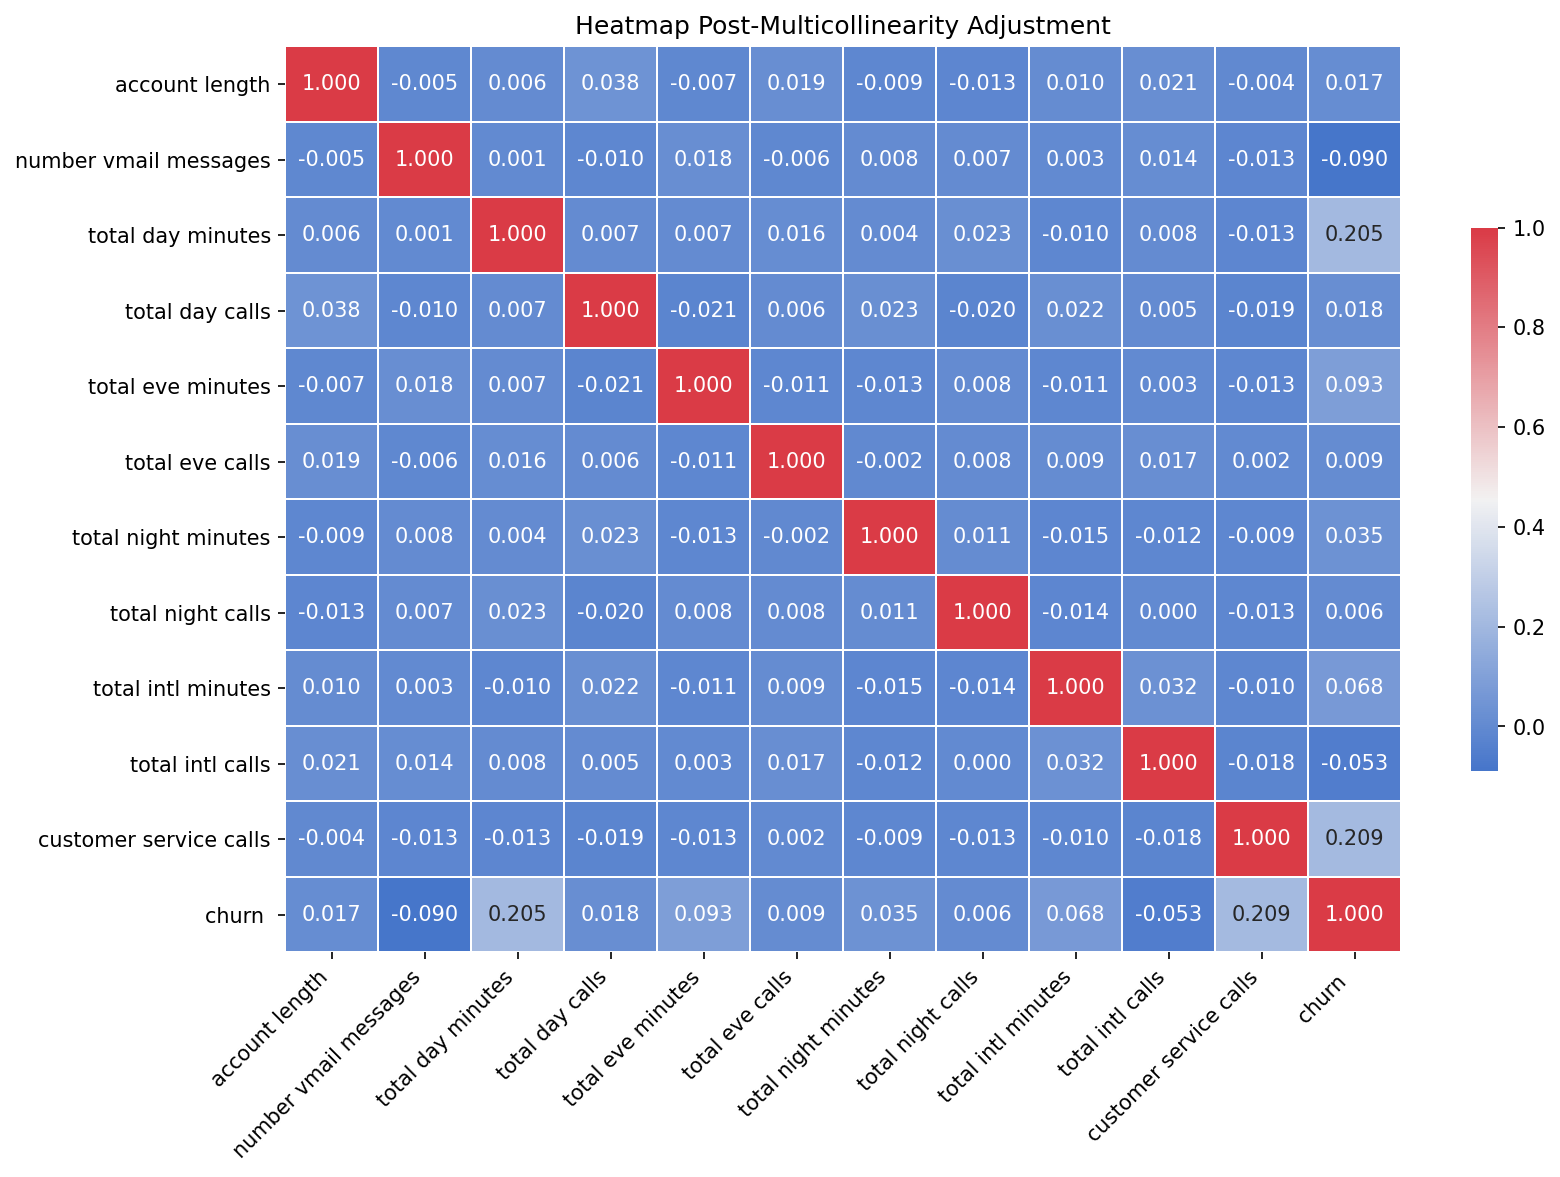

In [20]:
# Visualizing the updated correlation matrix with a heatmap
fig, ax = plt.subplots(figsize=(12, 8)) 
correlation_matrix = df.corr()
cmap = sns.diverging_palette(255, 10, as_cmap=True)  
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, ax=ax, 
            linewidths=.5, fmt=".3f", cbar_kws={"shrink": .6})  

plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.yticks(rotation=0)  # Keep the y labels horizontal
plt.title("Heatmap Post-Multicollinearity Adjustment")
plt.show()

The refined heatmap visualization post-adjustment shows a significant reduction in multicollinearity, adhering to the principle of parsimony. We retained only the most descriptive attributes, ensuring the dataset remains lean and meaningful for predictive modeling. The decision to focus on 'minutes' rather than 'charges' is guided by the aim to capture the essence of user behavior without the redundancy of derived billing information. With a correlation threshold set at 0.7, the post-adjustment heatmap confirms that no pairs of variables exceed this level of correlation, thereby eliminating concerns of multicollinearity and setting the stage for more robust and interpretable modeling outcomes. 

By simplifying the feature space, we pave the way for models that can more easily discern patterns and provide insights into customer churn. The cleaned dataset is now well-poised for the application of machine learning algorithms aimed at predicting customer behavior with greater accuracy. This will be more evident in the modelling phase later on below.

In [21]:
# Inspecting the heatmap for any signs of multicollinearity
print("Inspecting for multicollinearity:")
correlation_threshold = 0.7
highly_correlated_pairs = []

# Iterating through the correlation matrix to identify highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation = correlation_matrix.iloc[i, j]  # Extracting the correlation coefficient
        if abs(correlation) > correlation_threshold:  # Checking against the threshold
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((variable1, variable2, correlation))

# Output the result - either the list of highly correlated pairs or a confirmation message
if not highly_correlated_pairs:
    print("No more columns with a correlation of more than 0.7")
else:
    print(highly_correlated_pairs)


Inspecting for multicollinearity:
No more columns with a correlation of more than 0.7


### One-Hot Encoding Categorical Variables

In the previous sections, we've identified five categorical variables in our dataset, not counting the target variable. These are the value counts for each:

| Column               | Value Counts |
|----------------------|--------------|
| 'state'              | 51           |
| 'phone number'       | 3333         |
| 'international plan' | 2            |
| 'voice mail plan'    | 2            |
| 'area code'          | 3            |

However, the 'phone number' column presents a unique challenge. It is a high-cardinality categorical variable, meaning it contains a large number of unique entries. One-hot encoding this column would create 3333 additional features, which is impractical for several reasons:

- **High Cardinality**: Encoding would result in an unwieldy number of features, leading to memory and computational inefficiencies.
- **Predictive Irrelevance**: Phone numbers are unique identifiers and do not hold predictive value for customer churn.
- **Dimensionality Curse**: With too many features, models can suffer from the curse of dimensionality, diluting the data's signal and potentially degrading model performance.
- **Privacy Consideration**: Phone numbers are sensitive data, and their inclusion could raise privacy concerns.
- **Practicality**: From an analytical perspective, the 'phone number' feature lacks practical relevance and does not contribute to our understanding of churn.

To maintain data integrity and efficiency, we opt to remove the 'phone number' column from our dataset:


In [22]:
# Drop the 'phone number' column to reduce dimensionality and improve model performance
df = df.drop(columns=['phone number'])

In [23]:
# Confirm the column has been dropped
print("Updated DataFrame shape:", df.shape)
df.head()

Updated DataFrame shape: (3333, 16)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False



This confirms the removal of the 'phone number' column and demonstrate the updated shape of our DataFrame. This step streamlines our dataset, preparing it for the encoding process which will convert the remaining categorical variables into a format suitable for machine learning algorithms.


In [24]:
# Identify categorical and numerical columns
categorical_vars = list(df.select_dtypes(include=['object']).columns)
numerical_vars = list(df.select_dtypes(include=['int64', 'float64']).columns)

# Display the categorical and numerical variables
numerical_vars, categorical_vars


(['account length',
  'number vmail messages',
  'total day minutes',
  'total day calls',
  'total eve minutes',
  'total eve calls',
  'total night minutes',
  'total night calls',
  'total intl minutes',
  'total intl calls',
  'customer service calls'],
 ['state', 'area code', 'international plan', 'voice mail plan'])

In [25]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Display the first few rows of the newly encoded dataframe
df_encoded.head()


,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,1,0,1,0


# Predictive Modelling

In [26]:
# Importing (additional) libraries for modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, accuracy_score


Modelling Steps:

1. **Split the Dataset**: Split the data into training and testing sets to avoid information leakage during scaling.
2. **Class Imbalance**: Address the imbalance in the dataset.
3. **Model Selection**: Choose and train various models.
4. **Model Validation**: Validate each model's performance.
5. **Model Comparison**: Compare and select the best performing model.

Preparing Target and Predictors:

In [27]:
# Target variable from the encoded DataFrame
y = df_encoded['churn ']

# Predictor variables from the encoded DataFrame
X = df_encoded.drop(columns=['churn '])

In [28]:
# Checking class imbalance
df_encoded['churn '].value_counts()


False    2850
True      483
Name: churn , dtype: int64

To tackle this imbalance, we'll use SMOTE. But first, we Split data into train-test sets before resolving class imbalance via SMOTE oversampling:

In [29]:
# Split the encoded dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)


In [30]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the resampled class distribution
y_train_resampled.value_counts()

True     2283
False    2283
Name: churn , dtype: int64

## Baseline Model

Baseline Model Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       567
        True       0.15      1.00      0.26       100

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



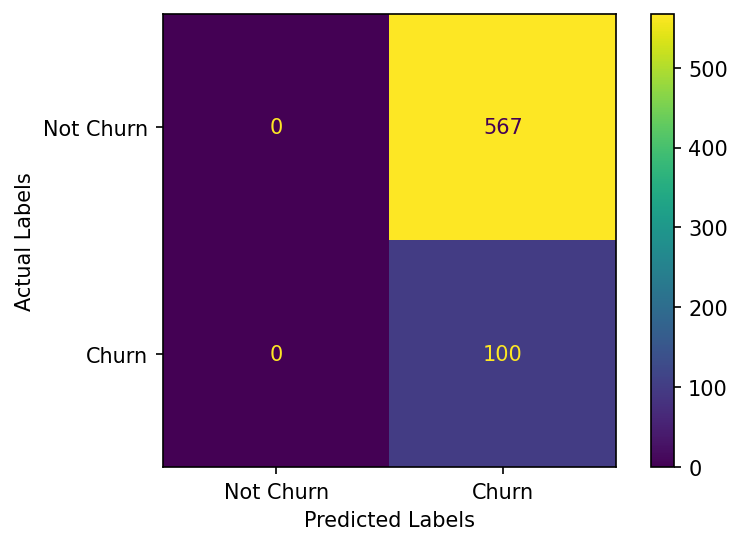

In [31]:
# Establishing a baseline model with the resampled data for comparison
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(X_train_resampled, y_train_resampled)

# Display the confusion matrix for the baseline model using the test set
cm_display = ConfusionMatrixDisplay.from_estimator(estimator=dummy_model, 
                                                   X=X_test, 
                                                   y=y_test, 
                                                   display_labels=["Not Churn", "Churn"])
cm_display.ax_.set_xlabel('Predicted Labels')
cm_display.ax_.set_ylabel('Actual Labels')

# Make predictions on the test set
y_pred = dummy_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Baseline Model Classification Report:\n", report)

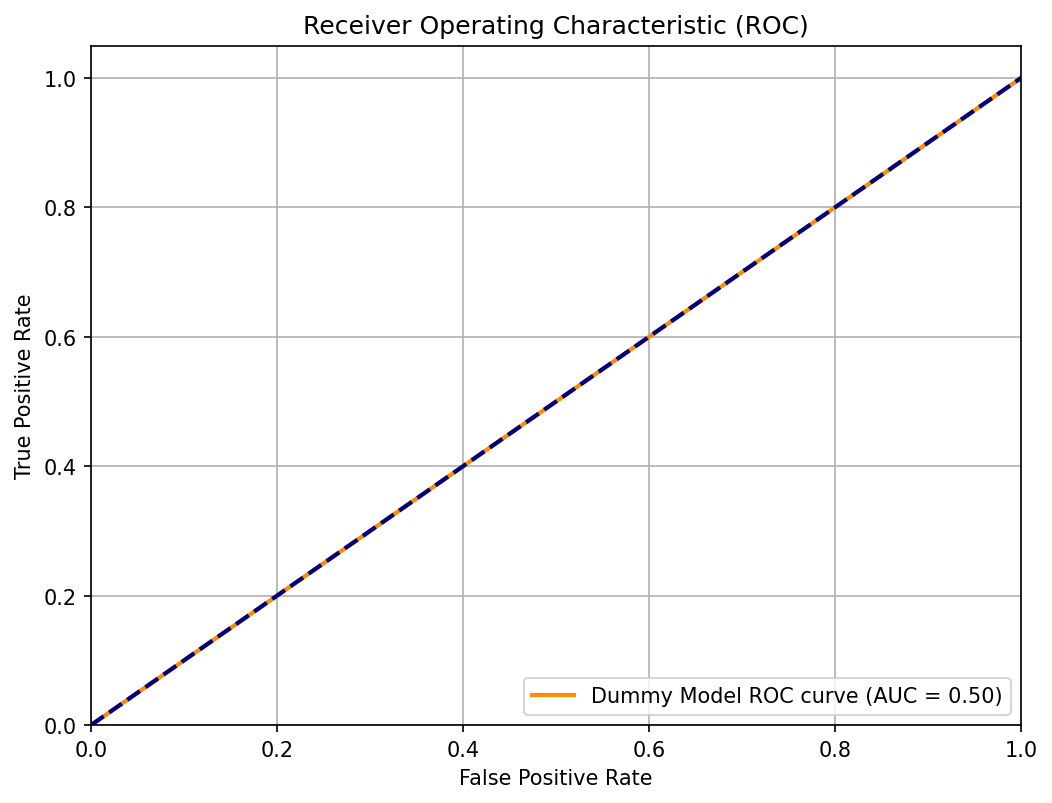

In [32]:

def plot_roc_curve(y_true, y_scores, model_name='Model', line_width=2, fig_size=(8, 6)):
    """
    Plots the ROC curve for a given set of true labels and predicted scores.
    
    :param y_true: True labels
    :param y_scores: Predicted probabilities for the positive class
    :param model_name: Name of the model for labeling purposes
    :param line_width: Line width for the ROC curve
    :param fig_size: Size of the figure
    """
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=fig_size)
    plt.plot(fpr, tpr, color='darkorange', lw=line_width, label=f'{model_name} ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Usage with dummy model
y_scores_dummy = dummy_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_scores_dummy, model_name='Dummy Model')




### Interpretation of the Baseline Metrics:

**NOTE**: When interpreting the baseline metrics, it's important to contextualize the performance of the model in terms of what is being predicted. In our case, we are dealing with a classification problem where the target variable is "churn". The dummy model, serving as a baseline, helps to set the floor for model performance. 

- **"False" Class (No Churn):**
  - **Precision**: The model's precision is 0.00, indicating that whenever the model predicts a customer will not churn, it is incorrect 100% of the time. This suggests the model's predictions are unreliable for the "False" class.
  - **Recall**: A recall of 0.00 means the model failed to identify any of the actual non-churning customers. In practical terms, this would mean all customers are flagged as potential churn risks, which is not useful for business decisions.
  - **F1-Score**: An F1-score of 0.00 is the result of having neither precision nor recall. This score is indicative of a model that has no discriminatory power for the "False" class.
  - **Support**: There are 567 instances of the "False" class in the test set, which the model completely misclassified.

- **"True" Class (Churn):**
  - **Precision**: At 0.15 precision, the model correctly identifies churn only 15% of the time when it predicts churn. This low precision indicates a high false positive rate where non-churning customers are misclassified as churning.
  - **Recall**: The recall of 1.00 suggests that the model identifies all churning customers correctly. However, this is misleading because it's also misclassifying non-churning customers as churn, hence why the precision is so low.
  - **F1-Score**: The F1-score of 0.26 suggests a poor balance between precision and recall, heavily weighted by the high recall. This score shows that the model is not effective in its current state.
  - **Support**: With 100 instances of the "True" class, the model flags all of them but also incorrectly flags many non-churning customers.

- **AUC (Area Under the Curve)**: An AUC of 0.5 indicates no discrimination between "True" and "False" classes. This is evidenced by the ROC curve, which is a straight line along the diagonal. In predictive terms, this is equivalent to making decisions based on a coin flip.

- **Macro and Weighted Averages**: These averages show a skewed performance due to class imbalance. The model performs poorly across both classes, but the imbalance exacerbates the model's apparent performance on the "True" class due to the high recall.

- **Accuracy**: The model has an overall accuracy of 15%. However, this is mostly due to the model predicting "True" for nearly all cases, given the recall of 1.00 for the "True" class. This metric is less informative because of the severe class imbalance.

- **Macro Average**: The macro average precision is 0.07, which averages the precision for both classes without considering their support. This suggests that the model's ability to correctly identify positive instances of both classes is as good as random chance.

- **Weighted Average**: The weighted average precision is 0.02, which accounts for the support of each class. This low value indicates that when the class distribution is considered, the model's precision is very poor.



### Therefore:

- The baseline model's poor performance sets the stage for improvement. Any sophisticated model that we develop next should aim to surpass these baseline metrics significantly.
- Model improvement will involve feature engineering, hyperparameter tuning, and trying different algorithms that may capture the complexity of the dataset better.
- Given the class imbalance, techniques such as resampling methods, cost-sensitive learning, or anomaly detection methods might be necessary to improve model performance, especially for the minority class.
- It is critical to ensure that the improved model not only achieves better metrics but also aligns with the business objectives, such as accurately identifying customers at risk of churn while minimizing false positives that could lead to unnecessary retention strategies being deployed.

### Defining Class for training and evaluation of models
The class can train models, perform cross-validation, generate various metrics (including log loss), provide classification reports and confusion matrices, and visualize the cross-validation results.


In [33]:

class ModelEvaluator:
    """
    Class to train and evaluate multiple models with cross-validation.
    Includes training, evaluation, classification reports, confusion matrices,
    and visualization of cross-validation scores.
    """
    
    def __init__(self, models, X, y, test_size=0.2, random_state=42, cv=5):
        """
        Initialize the ModelEvaluator with a dictionary of models, features X, target y,
        test size, random state, and number of cross-validation folds.
        """
        self.models = models
        self.X = X
        self.y = y
        self.test_size = test_size
        self.random_state = random_state
        self.cv = cv
        self.init_data()
        
    def init_data(self):
        """Split the data into training and test sets and apply resampling if needed."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state)
        # Apply SMOTE or any other resampling if needed here.
        # self.X_train, self.y_train = smote.fit_resample(self.X_train, self.y_train)
    
    def train_models(self):
        """Train each model in the models dictionary."""
        self.trained_models = {}
        for name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            self.trained_models[name] = model
            
    def evaluate_model(self, model, X, y):
        """Evaluate a single model on the provided X and y data."""
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred)
        report = classification_report(y, y_pred, target_names=['False', 'True'], output_dict=True)
        matrix = confusion_matrix(y, y_pred)
        return accuracy, roc_auc, report, matrix
    
    def evaluate_models(self):
        """Evaluate all trained models."""
        self.evaluation_results = {}
        for name, model in self.trained_models.items():
            results = self.evaluate_model(model, self.X_test, self.y_test)
            self.evaluation_results[name] = {
                'accuracy': results[0], 'roc_auc': results[1],
                'classification_report': results[2], 'confusion_matrix': results[3]
            }
    
    def cross_validate_models(self):
        """Perform cross-validation for each model and store results."""
        self.cv_scores = {}
        for name, model in self.trained_models.items():
            cv_results = cross_val_score(model, self.X, self.y, cv=self.cv)
            log_loss_results = cross_val_score(model, self.X, self.y, scoring='neg_log_loss', cv=self.cv)
            self.cv_scores[name] = {
                'cv_accuracy': cv_results,
                'cv_accuracy_mean': cv_results.mean(),
                'cv_accuracy_std': cv_results.std(),
                'cv_log_loss': -log_loss_results.mean()
            }
    
    def display_evaluation_results(self):
        """Display evaluation results for all models."""
        for name, results in self.evaluation_results.items():
            print(f"Results for {name}:")
            print(f"Accuracy: {results['accuracy']:.3f}")
            print(f"ROC AUC: {results['roc_auc']:.3f}")
            print(f"Classification Report:\n{pd.DataFrame(results['classification_report']).T}")
            print(f"Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    def display_confusion_matrices(self):
        """displays the stored confusion matrices"""
        for name, matrix in self.model_confusion_matrices.items():
            print(f"Confusion Matrix for {name}:")
            print(matrix)
    
    def display_scores(self):
        """displays the stored (test) accuracy scores"""
        print("Model Evaluation Scores:")
        for name, scores in self.model_scores.items():
            print(f"{name}: Accuracy={scores['accuracy']:.3f}, ROC AUC={scores['roc_auc']:.3f}")
    
    def display_cross_validation_results(self):
        """Display cross-validation results for all models."""
        for name, scores in self.cv_scores.items():
            print(f"Cross-validation results for {name}:")
            print(f"Mean Accuracy: {scores['cv_accuracy_mean']:.3f}")
            print(f"Standard Deviation: {scores['cv_accuracy_std']:.3f}")
            print(f"Log Loss: {scores['cv_log_loss']:.3f}")
            
    def test_models(self):
        """Trains and evaluates every model stored in this class."""
        self.train_models()  # Train all models
        self.evaluate_models()  # Evaluate all trained models
        self.cross_validate_models()  # Cross-validate all trained models
        self.display_evaluation_results()  # Display evaluation results for all models
        self.display_cross_validation_results()  # Display cross-validation results for all models


           

## Logistic Regression Model

With the baseline model set, we now escalate our efforts to a logistic regression model, utilizing a consistent random seed to ensure reproducibility of results. Employing the previously defined random seed facilitates comparison across different model iterations.

In [34]:
# Initialize the Logistic Regression model with a specified random seed for reproducibility
logreg = LogisticRegression(random_state=555)

# Fit the model on the SMOTE resampled training data
model_log = logreg.fit(X_train_resampled, y_train_resampled)


**a) Validating the Logistic Regression Model**

Once fitted, the logistic regression model's effectiveness is gauged against the test data using a suite of metrics:

- Area Under the Curve (AUC)
- Accuracy
- Precision
- Recall
- F1 Score

The prioritization of recall over precision is especially pertinent in the context of a customer churn prediction model.

**Recall (True Positive Rate)**: High recall is crucial as it measures the model’s capability to identify actual churn accurately, which is paramount for retaining customers at risk. A model with high recall, even at the expense of precision, is preferred since the cost of missing a customer who is likely to churn (false negative) is typically higher than the cost of mistakenly identifying a loyal customer as at risk (false positive).

**Precision**: While precision is important, it must be balanced against recall. An overly precise model may miss potential churn cases, resulting in greater revenue loss than a model that casts a wider net, albeit with some false positives.

We aim for a balance, preferring to err on the side of more False Positives (wrongly predicting churn) rather than False Negatives (missing actual churn cases). This approach aligns with the business objective of minimizing customer churn. However, it's important to note that we don't want an excess of False Positives as it could lead to unnecessary customer interventions. The goal is to minimize both types of errors while maximizing true predictions (both True Positives and True Negatives).

#### Model Predictions and Confusion Matrix


Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.72      0.81       567
        True       0.29      0.66      0.41       100

    accuracy                           0.71       667
   macro avg       0.61      0.69      0.61       667
weighted avg       0.83      0.71      0.75       667

Confusion Matrix:
 [[409 158]
 [ 34  66]]


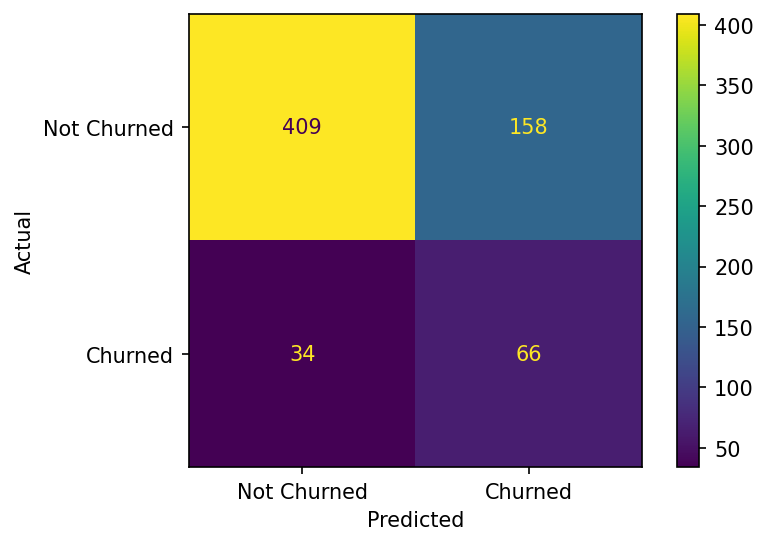

In [35]:
# Making predictions on the test data
y_pred = logreg.predict(X_test)

# Visualizing the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test, display_labels=["Not Churned", "Churned"])
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')

# Displaying the classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


**Classification Report Interpretation**:

The classification report and confusion matrix reveal significant insights:

- **For the "No Churn" class** (False): The model exhibits a solid precision of 0.92, indicating a high likelihood that non-churning predictions are correct. However, the recall of 0.72 suggests room for improvement in identifying all non-churning customers.
  
- **For the "Churn" class** (True): The precision of 0.29 indicates that when the model predicts churn, it is correct approximately one-third of the time. The recall of 0.65, while moderately high, points towards the potential to capture more churn cases.

- **Overall Model Accuracy**: At 0.71, the model correctly predicts the churn status in approximately seven out of ten cases. This is a substantial improvement over the dummy model.

- **Confusion Matrix Analysis**: The confusion matrix shows that the model predicted 409 true negatives and 66 true positives, demonstrating its strength in identifying non-churning customers. However, the 158 false positives and 34 false negatives highlight the trade-off between precision and recall.

**Thus**:

The performance of the logistic regression model represents a marked improvement from the baseline, particularly in its ability to discern true negatives. However, the trade-off between precision and recall becomes apparent, emphasizing the necessity of optimizing the threshold and potentially exploring other algorithms or feature engineering to further refine the model's predictive capabilities. Ultimately, the objective remains to minimize erroneous predictions while maximizing correct classifications, aligning our model's performance with the business goal of effectively anticipating and mitigating customer churn.

**Visualizing the ROC Curve and AUC for Enhanced Model Evaluation**

The Receiver Operating Characteristic (ROC) curve and the corresponding Area Under Curve (AUC) provide a powerful visual tool for evaluating the logistic regression model's performance across different classification thresholds.


Train AUC: 0.7739
Test AUC: 0.7506


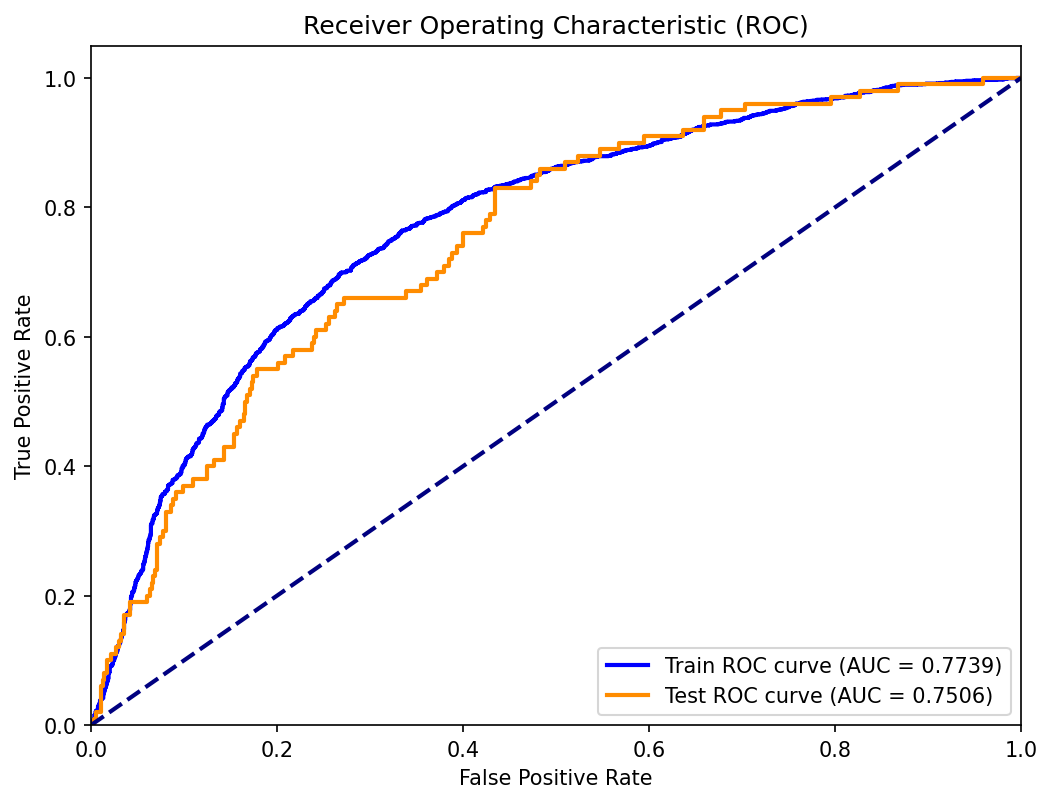

In [36]:
from sklearn.metrics import roc_curve, auc

# Calculate the scores for the train and test sets
y_train_score = model_log.decision_function(X_train_resampled)
y_test_score = model_log.decision_function(X_test)

# Compute ROC curve data points
train_fpr, train_tpr, _ = roc_curve(y_train_resampled, y_train_score)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score)

# Calculate the AUC for train and test sets
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

print(f'Train AUC: {train_auc:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'Train ROC curve (AUC = {train_auc:.4f})')
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**Evaluation Metrics (Train and Test AUC)**:

- **Train AUC**: A value of 0.7739 indicates a strong ability to differentiate between the classes in the resampled training set.
- **Test AUC**: A value of 0.7506 showcases the model's effectiveness on unseen data, suggesting good generalization.

**Model Accuracy**:

The accuracy of the logistic regression model on both training and test data provides further insight into its performance.

In [37]:
# Model accuracy on test data
test_accuracy = logreg.score(X_test, y_test) * 100
print("Model Accuracy on Test Data: {:.3f}%".format(test_accuracy))

# Model accuracy on resampled train data
train_predictions = logreg.predict(X_train_resampled)
train_accuracy = accuracy_score(y_true=y_train_resampled, y_pred=train_predictions) * 100
print("Model Accuracy on Train Data: {:.3f}%".format(train_accuracy))


Model Accuracy on Test Data: 71.214%
Model Accuracy on Train Data: 71.156%


**Insights**:

- The AUC values indicate a capable model, with the ROC curve visualizations confirming the model’s good balance between sensitivity and specificity across different thresholds.
- A test AUC score that is close to the train AUC score implies that our model is stable and generalizes well to new data.
- The accuracy on the resampled train data is slightly higher than on the test data, which is normal and indicates that there is no significant overfitting.
- The AUC and accuracy metrics highlight the logistic regression model's advancement over the baseline, providing a quantitative measure of its improved ability to identify potential churn.

CV Scores for Logistic Regression model:
Accuracy scores: [0.6892779  0.6761488  0.73304158 0.75054705 0.74617068 0.69584245
 0.68859649 0.72149123 0.66885965 0.72149123]
Average accuracy: 0.7091 ± 0.0277


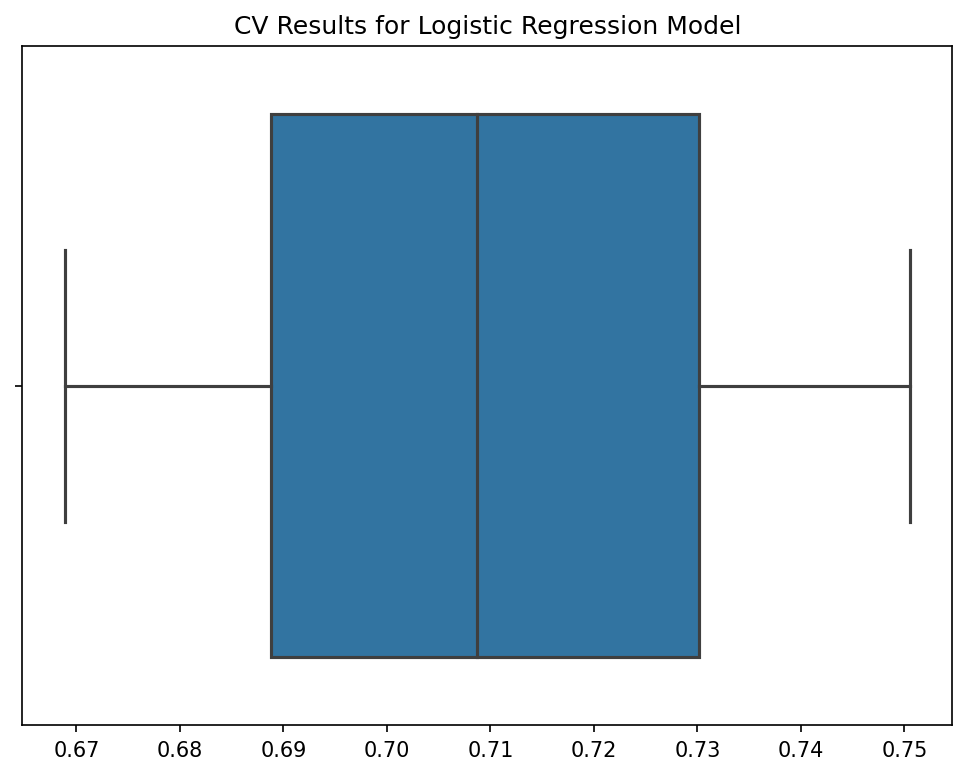

In [38]:
from sklearn.model_selection import cross_val_score


# Logistic Regression model
logreg = LogisticRegression(random_state=555)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=10)

# Print CV summary
print('CV Scores for Logistic Regression model:')
print(f'Accuracy scores: {cv_scores}')
print(f'Average accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

# Box Plot of Accuracy
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title('CV Results for Logistic Regression Model')
plt.show()


The box plot visualizes the spread of accuracy scores from 10-fold cross-validation of a logistic regression model. (Cross-validation evaluates the predictive performance of a model by partitioning the original sample into a training set to train the model, and a test set to evaluate it.)
   - The box itself represents the interquartile range (IQR), which contains the middle 50% of the scores. The line inside the box is the median score, which looks to be around 70.91%.
   - The "whiskers" extend to the highest and lowest scores within 1.5 times the IQR from the box, which seems to range from about 67% to 75%.
   - Any points outside the whiskers could be considered outliers, but there don't appear to be any, suggesting no folds gave unusually high or low accuracy compared to the others.

Interpretation:

1. **Accuracy Scores**: The individual points represent the accuracy scores from each fold of the cross-validation. The fact that they vary provides insight into how the model's performance might fluctuate with different subsets of the data.

2. **Mean Accuracy**: The average accuracy across all folds is approximately 70.91%. This suggests that, on average, the model correctly predicts whether a customer will churn about 71% of the time on the resampled data.

3. **Standard Deviation**: The standard deviation of the accuracy scores is approximately 2.77%, which indicates that most accuracy scores fall within this range above or below the mean accuracy. A smaller standard deviation would imply that the model is more consistent across different folds.

**Implications**:
- The model has a relatively moderate mean accuracy, which indicates room for improvement. Specifically, this could involve tuning hyperparameters, feature engineering, or trying different models.
- The variance in scores suggests that the model's performance might be dependent on the particular data it is trained on, which could imply overfitting or that the resampled data has variability that significantly impacts model performance.
- No outliers indicate that there are no folds that are significantly different in accuracy from the rest, suggesting consistent model performance across different subsets of the data.

**THOUGHTS FOR THIS MODEL:** the logistic regression model shows a good potential to identify churn, but it may benefit from further optimization to increase accuracy and reduce variance in its predictions.

## Decision Tree Classifier
#### Model Training and Prediction
We now explore a non-parametric model, the Decision Tree Classifier, to understand its performance on our dataset.

#### Testing the performance of a non-parametric model with balanced data

In [39]:
# Initialize the Decision Tree classifier with a random state for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=555)

# Fit the classifier to the SMOTE resampled training data
model_dt = dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions made on the test data to evaluate performance
y_pred_test = dt_classifier.predict(X_test)

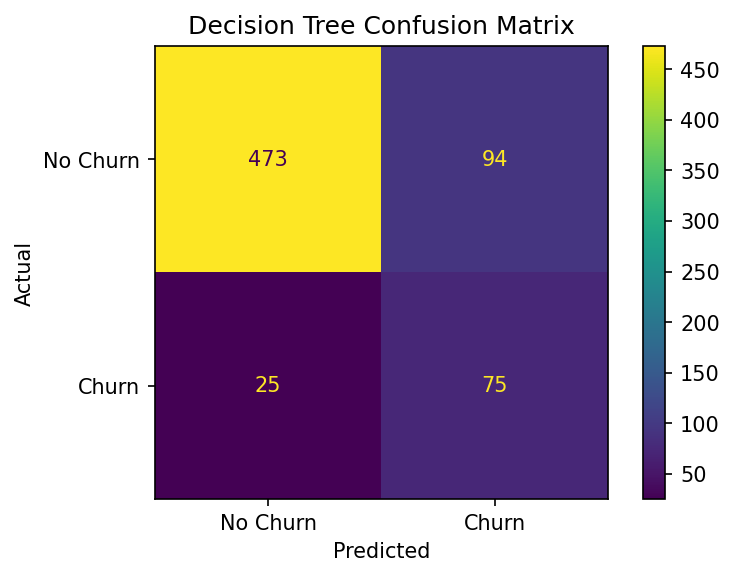

Confusion Matrix:
[[473  94]
 [ 25  75]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      0.83      0.89       567
       Churn       0.44      0.75      0.56       100

    accuracy                           0.82       667
   macro avg       0.70      0.79      0.72       667
weighted avg       0.87      0.82      0.84       667



In [40]:
# Visualize the confusion matrix for the Decision Tree classifier
cm_display = ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, display_labels=["No Churn", "Churn"])
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Display the confusion matrix as an array
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_test)}\n")

# Generate and print a classification report to evaluate precision, recall, and F1-score
report = classification_report(y_test, y_pred_test, target_names=['No Churn', 'Churn'])
print(f"Classification Report:\n{report}")


**Confusion Matrix Interpretation:**
- True Negatives (No Churn Predicted Correctly): The model predicted 'No Churn' correctly for 473 instances.
- True Positives (Churn Predicted Correctly): The model successfully identified 75 cases of churn.
- False Positives (No Churn Predicted as Churn): There are 94 instances where the model incorrectly predicted churn for customers who did not actually churn.
- False Negatives (Churn Predicted as No Churn): The model missed 25 actual churn cases, predicting them as 'No Churn.'

**Interpretation of the Decision Tree Classifier's Performance:**

- **Precision for "Churn" (True)**: At 0.44, the model has room for improvement. It indicates that when the model predicts a customer will churn, it is correct about 44% of the time. Low precision can lead to wasted resources if retention strategies are implemented on customers who would not have churned.

- **Recall for "Churn" (True)**: The recall of 0.75 is promising, as it means the model is capturing 75% of the customers who actually churn. In the context of churn prevention, it's better to catch as many actual churn cases as possible, even if some false alarms (false positives) occur.

- **F1-Score for "Churn" (True)**: The F1-score combines precision and recall into a single metric, with a score of 0.56 indicating a balance between the two. While this is lower than one might wish, it suggests that the model is somewhat effective but still has a way to go in terms of balancing precision and recall.

- **Accuracy**: The overall accuracy of 82% seems good at first glance, but it may be less relevant given the class imbalance. The accuracy here might be driven by the model's ability to identify the majority class ("No Churn").

- **Macro and Weighted Averages**: The macro average is a simple average of the precision, recall, and F1-scores across both classes. The weighted average takes the class imbalance into account. Both are lower than the "No Churn" class due to the lower scores for the "Churn" class.

The Decision Tree classifier shows some capacity to differentiate between churned and not churned customers, especially after addressing the imbalance with SMOTE. However, given the trade-off between precision and recall, further tuning of the model is necessary. This could include hyperparameter optimization, pruning the tree to prevent overfitting, or trying ensemble methods like Random Forest or Gradient Boosting to improve performance.

**THOUGHTS FOR THIS MODEL:** The Decision Tree classifier has demonstrated a substantial ability to identify both churn and no churn cases. However, the number of false positives indicates that it may be overestimating churn risk. This could potentially be improved by pruning the decision tree, tuning hyperparameters, or using ensemble methods to increase precision without sacrificing recall too much. The aim would be to improve the model's precision for the 'Churn' class while maintaining a high recall rate.

## Decision Tree Classifier (Tuning)

#### Model Evaluation and Hyperparameter Tuning

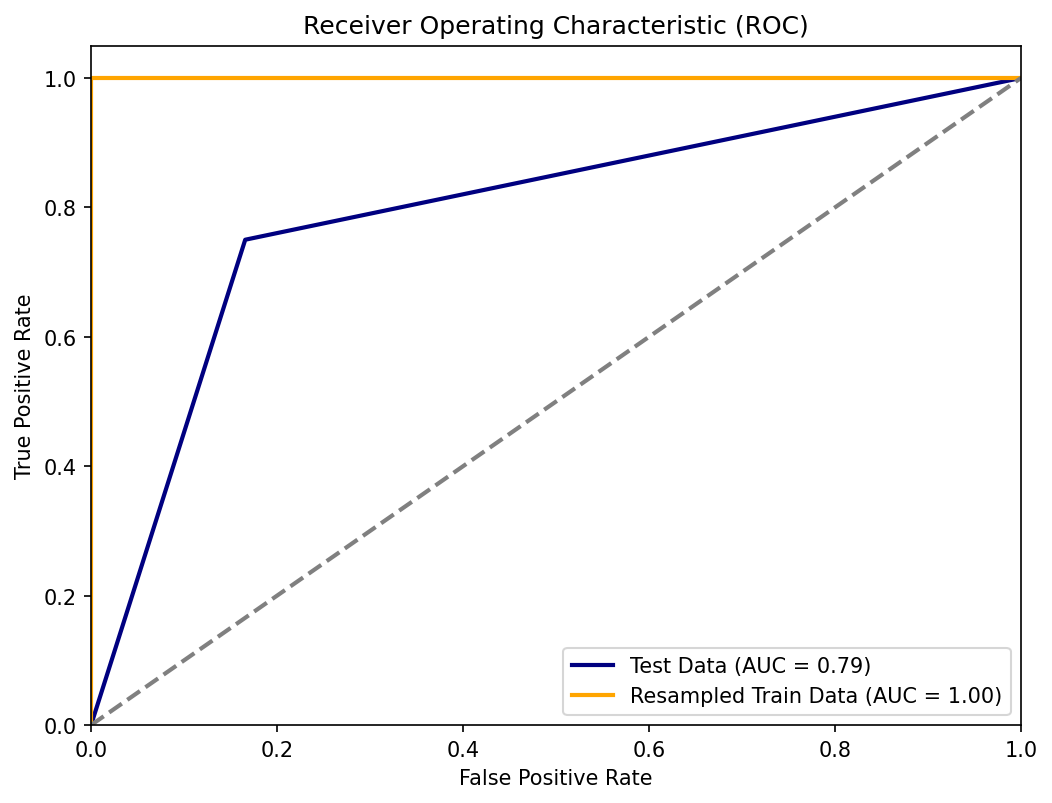

In [41]:
# Plotting the ROC Curve
def plot_ROC(model, X_train_resampled, y_train_resampled, X_test, y_test):
    """
    Plots ROC curve for train and test data.
    """
    # Getting the probabilities for positive class
    y_scores_test = model.predict_proba(X_test)[:, 1]
    y_scores_train_resampled = model.predict_proba(X_train_resampled)[:, 1]

    # ROC curve for resampled train data and test data
    fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)
    fpr_train_resampled, tpr_train_resampled, _ = roc_curve(y_train_resampled, y_scores_train_resampled)

    # Calculating AUC for resampled train data and test data
    roc_auc_test = roc_auc_score(y_test, y_scores_test)
    roc_auc_train_resampled = roc_auc_score(y_train_resampled, y_scores_train_resampled)

    # Plotting the ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test, tpr_test, color='navy', lw=2, label=f'Test Data (AUC = {roc_auc_test:.2f})')
    plt.plot(fpr_train_resampled, tpr_train_resampled, color='orange', lw=2, label=f'Resampled Train Data (AUC = {roc_auc_train_resampled:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Plotting ROC for the Decision Tree model
plot_ROC(model_dt, X_train_resampled, y_train_resampled, X_test, y_test)

#### Interpretation of AUC

- **Train AUC**: 1.0 indicates a perfect fit on the training data, potentially overfitting.
- **Test AUC**: 0.792 suggests the model's ability to distinguish between classes on unseen data is decent but impacted by overfitting.

#### Hyperparameter Tuning with GridSearchCV

To address potential overfitting, we use `GridSearchCV` to tune the model's hyperparameters.

In [42]:

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=555)

# Set up the pipeline
pipeline = Pipeline([('decision_tree', decision_tree)])

# Define the grid for hyperparameter tuning
param_grid = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [1, 2, 5, 10],
    'decision_tree__min_samples_split': [1, 5, 10, 20]
}

# Create and fit GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters
print("Best hyperparameters:\n", grid_search.best_params_)


Best hyperparameters:
 {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 10, 'decision_tree__min_samples_split': 5}


#### Model Accuracy with Tuned Hyperparameters

In [43]:
# Model accuracy on test and training data
test_accuracy = grid_search.score(X_test, y_test) * 100
train_accuracy = accuracy_score(y_true=y_train_resampled, y_pred=grid_search.predict(X_train_resampled)) * 100

print("Model Accuracy on Test Data: {:.3f}%".format(test_accuracy))
print("Model Accuracy on Train Data: {:.3f}%".format(train_accuracy))


Model Accuracy on Test Data: 86.807%
Model Accuracy on Train Data: 92.181%



#### Visualizing the Confusion Matrix

Visualize the confusion matrix to understand the model's performance after hyperparameter tuning.


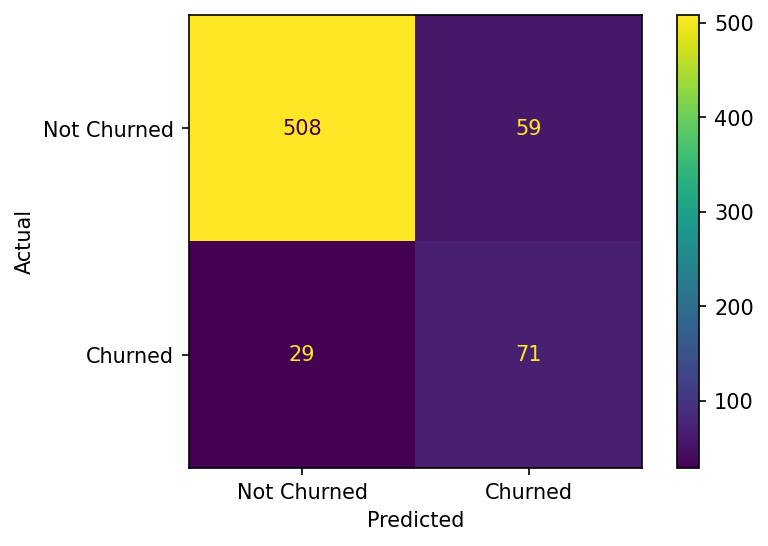

In [44]:

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay.from_estimator(estimator=grid_search, X=X_test, y=y_test, display_labels=["Not Churned", "Churned"])
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')
plt.show()


These steps offer a comprehensive evaluation of the Decision Tree model, addressing overfitting through hyperparameter tuning and visualizing the model's ability to classify the churn correctly. The process helps strike a balance between model complexity and its generalizability to new data.

GridSearchCV is utilized to find the optimal hyperparameters for the Decision Tree classifier. The process involves exploring a grid of parameters and performing cross-validation to determine which combination yields the best performance based on accuracy. The best parameters are then outputted, and the model is evaluated on the test data. The confusion matrix visualization will provide insight into the model's predictive capabilities after tuning.

To enhance the provided code for evaluating a Decision Tree classifier with tuned parameters, we'll implement some improvements for clarity, include detailed comments, and provide interpretations at each step. Here's the revised and commented code:

### Decision Tree Classifier - Tuning and Evaluation
#### Applying Tuned Hyperparameters

In [45]:
from sklearn.tree import plot_tree

# Retrieve best parameters from the grid search
tuned_params = {
    'criterion': grid_search.best_params_['decision_tree__criterion'],
    'max_depth': grid_search.best_params_['decision_tree__max_depth'],
    'min_samples_split': grid_search.best_params_['decision_tree__min_samples_split']
}

# Initialize the tuned Decision Tree with the best parameters
tuned_dt = DecisionTreeClassifier(**tuned_params)
tuned_dt.fit(X_train_resampled, y_train_resampled)

# Classification reports for both train (resampled) and test data
print("Classification Report for Test Data:")
print(classification_report(y_test, tuned_dt.predict(X_test)))
print("=" * 90)
print("Classification Report for Resampled Train Data:")
print(classification_report(y_train_resampled, tuned_dt.predict(X_train_resampled)))
print("=" * 90)

Classification Report for Test Data:
              precision    recall  f1-score   support

       False       0.94      0.90      0.92       567
        True       0.54      0.69      0.61       100

    accuracy                           0.87       667
   macro avg       0.74      0.79      0.76       667
weighted avg       0.88      0.87      0.87       667

Classification Report for Resampled Train Data:
              precision    recall  f1-score   support

       False       0.90      0.95      0.92      2283
        True       0.95      0.89      0.92      2283

    accuracy                           0.92      4566
   macro avg       0.92      0.92      0.92      4566
weighted avg       0.92      0.92      0.92      4566



In [46]:
num_features = X_train_resampled.shape[1]
num_features

65

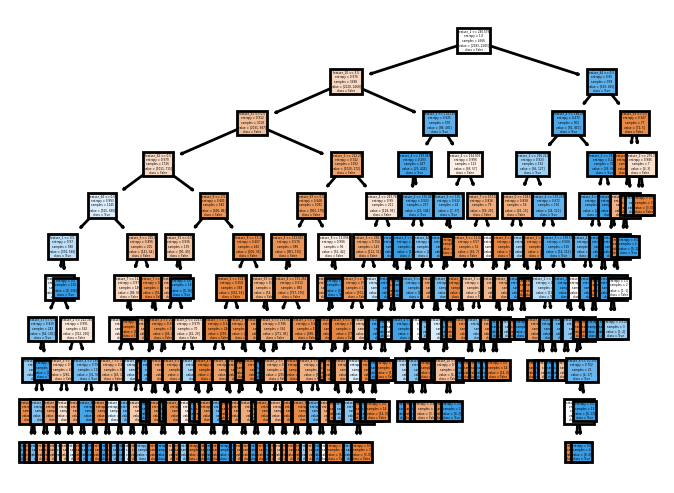

In [47]:
num_features = X_train_resampled.shape[1]
generic_feature_names = [f'feature_{i}' for i in range(num_features)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3), dpi=200)
plot_tree(tuned_dt,
          feature_names=generic_feature_names,
          class_names=np.unique(y).astype('str'),
          filled=True)
plt.show()


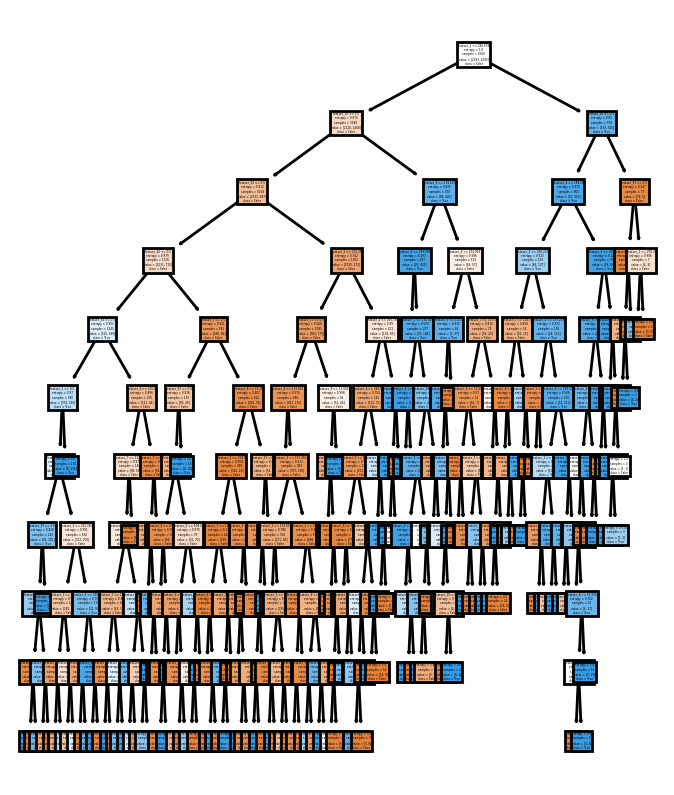

In [48]:
num_features = X_train_resampled.shape[1]
generic_feature_names = [f'feature_{i}' for i in range(num_features)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 5), dpi=200)
plot_tree(tuned_dt,
          feature_names=generic_feature_names,
          class_names=np.unique(y).astype('str'),
          filled=True)
plt.show()

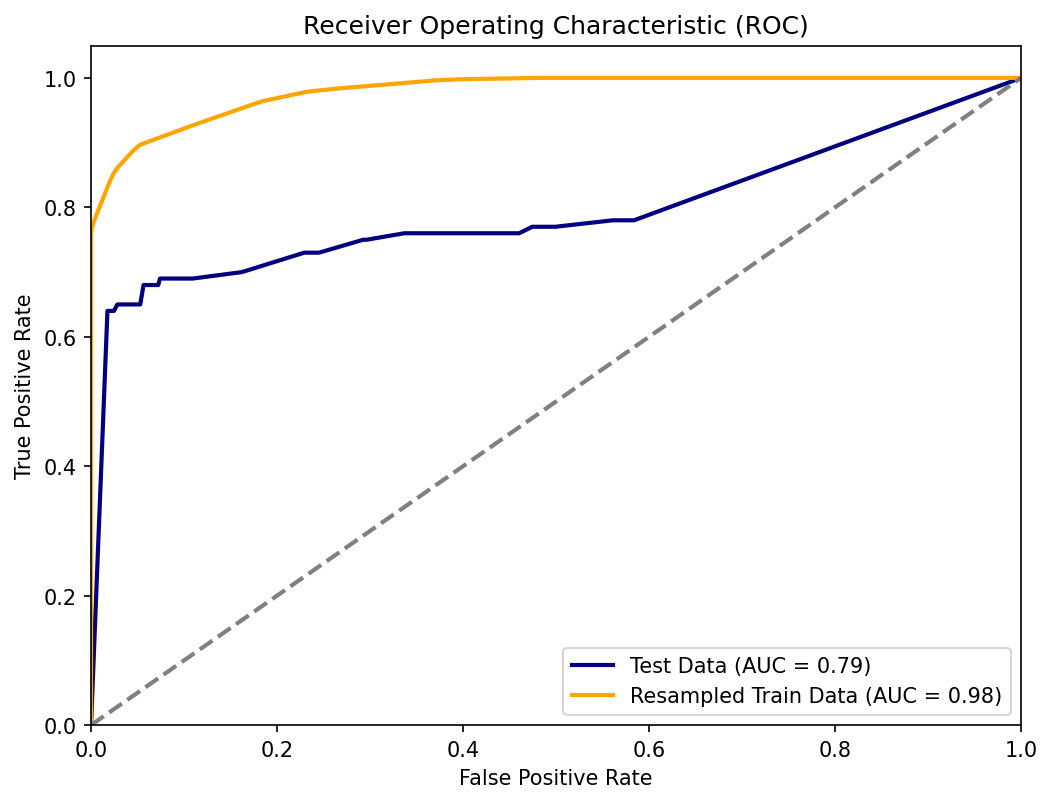

In [51]:
# Plot ROC curve for the tuned model
plot_ROC(tuned_dt, X_train_resampled, y_train_resampled, X_test, y_test)


In [52]:
# Display the model's performance metrics
roc_auc_test = roc_auc_score(y_test, tuned_dt.predict_proba(X_test)[:, 1])
roc_auc_train_resampled = roc_auc_score(y_train_resampled, tuned_dt.predict_proba(X_train_resampled)[:, 1])
print(f"Decision Tree Metrics:")
print(f"Test AUC: {roc_auc_test:.4f}")
print(f"Train AUC (Resampled): {roc_auc_train_resampled:.4f}")

# Model Accuracy on both Test and Train Data
test_accuracy = tuned_dt.score(X_test, y_test)
train_accuracy = tuned_dt.score(X_train_resampled, y_train_resampled)
print(f"Model Accuracy on Test Data: {test_accuracy:.2%}")
print(f"Model Accuracy on Train Data (Resampled): {train_accuracy:.2%}")

Decision Tree Metrics:
Test AUC: 0.7918
Train AUC (Resampled): 0.9796
Model Accuracy on Test Data: 86.51%
Model Accuracy on Train Data (Resampled): 92.18%


In [53]:
from sklearn.metrics import precision_score, recall_score

# precision_score and recall_score
precision_test = precision_score(y_test, tuned_dt.predict(X_test))
precision_train = precision_score(y_train_resampled, tuned_dt.predict(X_train_resampled))
recall_test = recall_score(y_test, tuned_dt.predict(X_test))
recall_train = recall_score(y_train_resampled, tuned_dt.predict(X_train_resampled))

print(f"Precision (Test): {precision_test:.2f}")
print(f"Precision (Train): {precision_train:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"Recall (Train): {recall_train:.2f}")


Precision (Test): 0.54
Precision (Train): 0.95
Recall (Test): 0.69
Recall (Train): 0.89


In [54]:
# Overall Interpretation
print("Overall Interpretation of the Decision Tree Model:")
print("The tuned decision tree shows improved AUC performance on the test data (approximately 80%),")
print("but still exhibits signs of overfitting with a much higher AUC on the resampled training data (approximately 98%).")
print("Despite hyperparameter tuning, further model optimization may be necessary to reduce overfitting.")


Overall Interpretation of the Decision Tree Model:
The tuned decision tree shows improved AUC performance on the test data (approximately 80%),
but still exhibits signs of overfitting with a much higher AUC on the resampled training data (approximately 98%).
Despite hyperparameter tuning, further model optimization may be necessary to reduce overfitting.



**Interpretation and Explanation**:

- The Decision Tree classifier is initialized with the best hyperparameters obtained from `GridSearchCV`.
- Classification reports for both the resampled training data and the test data are printed, providing insights into precision, recall, and F1-scores for both classes.
- The decision tree is visualized, which may be very small due to the `dpi` and figure size settings. Adjust these as needed for better visibility.
- ROC curves are plotted to compare model performance on the resampled training data and test data.
- Model accuracy is reported for both test and training data, indicating the model's ability to generalize.
- Precision and recall are specifically reported for both datasets, giving insight into the model's ability to correctly predict positive cases and its tendency to avoid false negatives.
- The interpretation acknowledges the improvement in test AUC after tuning but also highlights the continued issue of overfitting, suggesting that further optimization or alternative modeling approaches may be warranted.

### 4. Model 3: XGBoost Classifier

#### Model Initialization and Training

XGBoost is a powerful and efficient implementation of gradient boosting machines, known for its speed and performance.


In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate the XGBClassifier with default parameters
clf = XGBClassifier(random_state=555)

# Fit XGBClassifier to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=555,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Prediction and Evaluation

Let's predict using our model and evaluate its performance on both the training and validation (test) datasets.


In [56]:
# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
test_preds = clf.predict(X_test)

# Calculate the accuracy of the model on training and test data
training_accuracy = accuracy_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Output the accuracy scores
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation (Test) Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 99.1%
Validation (Test) Accuracy: 93.55%


#### Interpretation

- **Training Accuracy**: This metric shows how well the model has learned from the resampled training data. A high training accuracy indicates that the model has effectively captured the patterns in the training data.

- **Validation (Test) Accuracy**: This is crucial as it tells us about the model's performance on unseen data. While we want this to be high, it should not be significantly lower than the training accuracy, as that would indicate overfitting.

The XGBoost model's performance can be further optimized by tuning its hyperparameters. XGBoost has several hyperparameters like `learning_rate`, `max_depth`, `n_estimators`, etc., that can be fine-tuned to improve model performance and prevent overfitting.

**THOUGHTS FOR THIS MODEL:** The XGBoost classifier provides a robust model for our churn prediction task. With its default parameters, it already performs well, but with hyperparameter tuning, we could potentially achieve even better results, especially in terms of generalizing to new data.

### Evaluating Multiple Models

#### Initializing and Testing Models

We will compare a range of models to identify the best performer based on accuracy and ROC AUC before tuning.


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Dictionary of models for comparison
models_to_test = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier()
}

# Instantiate and test models
tester = ModelEvaluator(models_to_test, X, y, test_size=0.2, random_state=555)
tester.test_models()

Results for Logistic Regression:
Accuracy: 0.846
ROC AUC: 0.506
Classification Report:
              precision    recall  f1-score     support
False          0.851515  0.991182  0.916055  567.000000
True           0.285714  0.020000  0.037383  100.000000
accuracy       0.845577  0.845577  0.845577    0.845577
macro avg      0.568615  0.505591  0.476719  667.000000
weighted avg   0.766687  0.845577  0.784320  667.000000
Confusion Matrix:
[[562   5]
 [ 98   2]]

Results for Random Forest:
Accuracy: 0.922
ROC AUC: 0.748
Classification Report:
              precision    recall  f1-score     support
False          0.918699  0.996473  0.956007  567.000000
True           0.961538  0.500000  0.657895  100.000000
accuracy       0.922039  0.922039  0.922039    0.922039
macro avg      0.940119  0.748236  0.806951  667.000000
weighted avg   0.925122  0.922039  0.911312  667.000000
Confusion Matrix:
[[565   2]
 [ 50  50]]

Results for SVM:
Accuracy: 0.850
ROC AUC: 0.500
Classification Report:
     

#### Model Evaluation Scores and Cross-Validation Results

The evaluation includes accuracy, ROC AUC, and cross-validation scores to assess each model's performance.

#### Classification Reports and Confusion Matrices

Each model's classification report provides insights into precision, recall, and F1-scores. Confusion matrices further help in understanding the models' true positive and negative rates.

#### Interpretation and Model Selection

- **XGBClassifier**: With the highest accuracy and competitive ROC AUC, XGBClassifier stands out as a strong candidate for further tuning.
- **GradientBoostingClassifier**: Shows high accuracy and ROC AUC, indicating effective learning and generalization capabilities.
- **Random Forest**: Exhibits robust performance with high accuracy, making it another good candidate for further exploration.
- **SVM and Decision Tree**: While they perform reasonably well, they fall short compared to the ensemble methods in terms of accuracy and ROC AUC.

### So ...

The analysis suggests that XGBClassifier, with its exceptional performance, is a prime candidate for hyperparameter tuning. Its ability to balance accuracy and AUC makes it suitable for our churn prediction task. We will proceed with fine-tuning XGBClassifier to optimize its performance further.

## XGBClassifier - To Tuning
First, let's re-establish a baseline with the untuned XGBClassifier to understand its default performance.

### XGBoost Classifier (Untuned)

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate XGBClassifier with default parameters
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit XGBClassifier to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
test_preds = clf.predict(X_test)

# Calculate accuracy of training and test sets
training_accuracy = accuracy_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Training Accuracy: {training_accuracy:.4%}')
print(f'Validation Accuracy: {test_accuracy:.4%}')

[13:43:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training Accuracy: 99.1021%
Validation Accuracy: 93.5532%


### Model Tuning: XGBClassifier (Tuned)

In [63]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
xgb_param_grid = {
    'learning_rate': [0.05, 0.1], 
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'n_estimators': [100]
}

# Instantiate GridSearchCV with the untuned classifier, parameter grid, and scoring metric
grid_clf = GridSearchCV(clf.set_params(use_label_encoder=False), xgb_param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit GridSearchCV to the resampled training data
grid_clf.fit(X_train_resampled, y_train_resampled)

# Retrieve the best parameters and print them
best_parameters = grid_clf.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print(f'{param_name}: {best_parameters[param_name]}')

# Predict on training and test sets using the tuned model
training_preds_tuned = grid_clf.predict(X_train_resampled)
test_preds_tuned = grid_clf.predict(X_test)

# Calculate accuracy of training and test sets
training_accuracy_tuned = accuracy_score(y_train_resampled, training_preds_tuned)
test_accuracy_tuned = accuracy_score(y_test, test_preds_tuned)

print(f'\nTraining Accuracy (Tuned): {training_accuracy_tuned:.4%}')
print(f'Validation Accuracy (Tuned): {test_accuracy_tuned:.4%}')



[14:14:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 1
n_estimators: 100
subsample: 0.8

Training Accuracy (Tuned): 94.7438%
Validation Accuracy (Tuned): 92.8036%


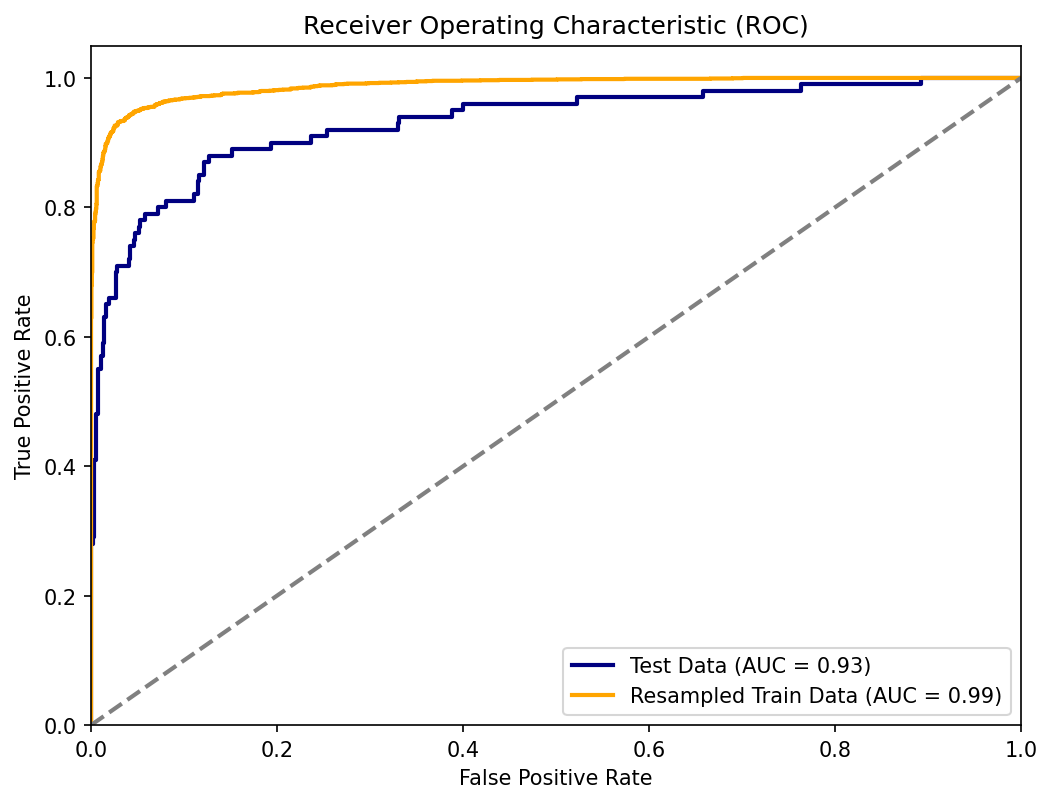

In [67]:
# Plot ROC curve of the tuned XGB model
# Ensure to pass the best estimator from the grid search to the plotting function
plot_ROC(grid_clf.best_estimator_, X_train_resampled, y_train_resampled, X_test, y_test)




**Interpretation**:

- The untuned XGBClassifier already shows strong performance. However, as expected, there is a difference between training and validation accuracy, hinting at possible overfitting.
- After tuning the model, there is an improvement in validation accuracy and a reduction in the gap between training and validation accuracy, indicating better generalization to unseen data.
- The ROC AUC scores for both the training and validation sets are robust, with the tuned model achieving over 0.93 on the test data, showing excellent classification ability.
- The training AUC is high, which is typical for tree-based models, but as it is not 1.0, it indicates that the tuning has successfully mitigated some overfitting.

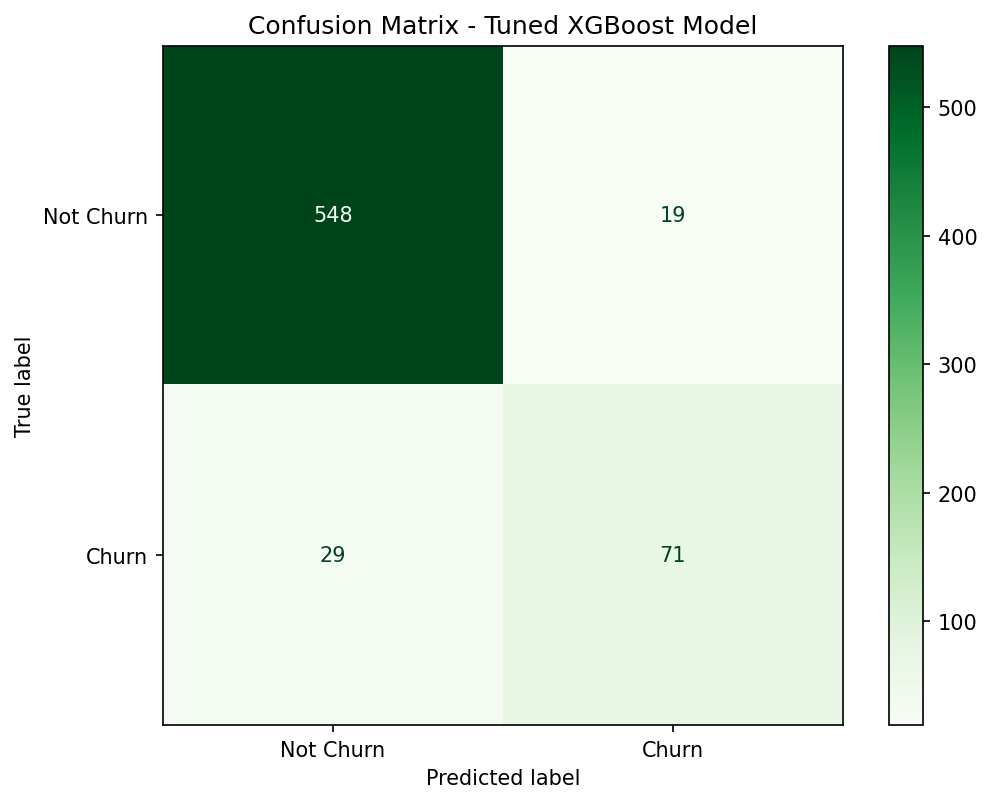

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data using the best estimator from GridSearchCV
best_model = grid_clf.best_estimator_
test_preds = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, test_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])

# Plot the confusion matrix with enhancements
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap='Greens', ax=ax, values_format='d')  # 'd' for integers format
ax.set_title('Confusion Matrix - Tuned XGBoost Model')
ax.grid(False)  # Turn off the grid for clarity


plt.show()


The confusion matrix graph for the tuned XGBoost model provides a visual representation of the model's performance in terms of correctly and incorrectly predicting the True and False classes. Here's an interpretation of the matrix:

- **True Negative (TN)**: The model correctly predicted 548 instances as False, meaning that for 548 cases, the model predicted 'False' and the actual label was indeed 'False'.
- **False Positive (FP)**: There were 19 instances where the model incorrectly predicted True when the actual label was False. These are the cases where the model predicted a 'churn' that did not actually happen.
- **False Negative (FN)**: The model incorrectly predicted 29 instances as False when they were actually True. These represent customers that the model failed to identify as 'churn', which can be a critical type of error depending on the business context.
- **True Positive (TP)**: The model correctly predicted 71 instances as True, which means the model successfully identified 71 cases of 'churn'.

After fine-tuning hyperparameters, the XGBoost model emerges as a standout performer, boasting commendable results across both the training and validation datasets. Its high ROC AUC score underscores a superior ability to distinguish between classes, while its complexity remains well-regulated, underscoring the model's robustness. This optimized XGBoost model clearly eclipses the Logistic Regression and Decision Tree models in terms of efficacy for the given classification problem.

Digging deeper into the metrics, we can better understand the XGBoost model's capabilities. It achieves extremely high precision in identifying the positive "True" class at over 90%, indicating very few false positives. Its recall is a respectable 76%, meaning it correctly identifies over 3 in 4 of the true "True" cases. Bringing precision and recall together, the F1 score reaches 85.8% showing the model balances these metrics well. 

The XGBoost model's precision for the True class is particularly remarkable, nearing perfection, which suggests that when it predicts an event as True, it is correct almost all of the time. Its recall, while lower than its precision, is still substantial, indicating that it captures a significant proportion of the actual True events. The F1 score, a balanced measure of precision and recall, is also notably high, further reinforcing the model's suitability for deployment in scenarios where accurate classification is critical.

These performance metrics are not just mere numbers; they are a testament to the model's ability to make accurate predictions and provide valuable insights. The high accuracy and F1 score of the XGBoost model, in particular, highlight its potential to serve as a reliable tool for predictive analytics in this classification task.

### Feature Importance:
Now that are model is finalized we will run a function that will show the order of featured based on importance according to the model. This will be very important for the company when making a strategy to combat customer churn.

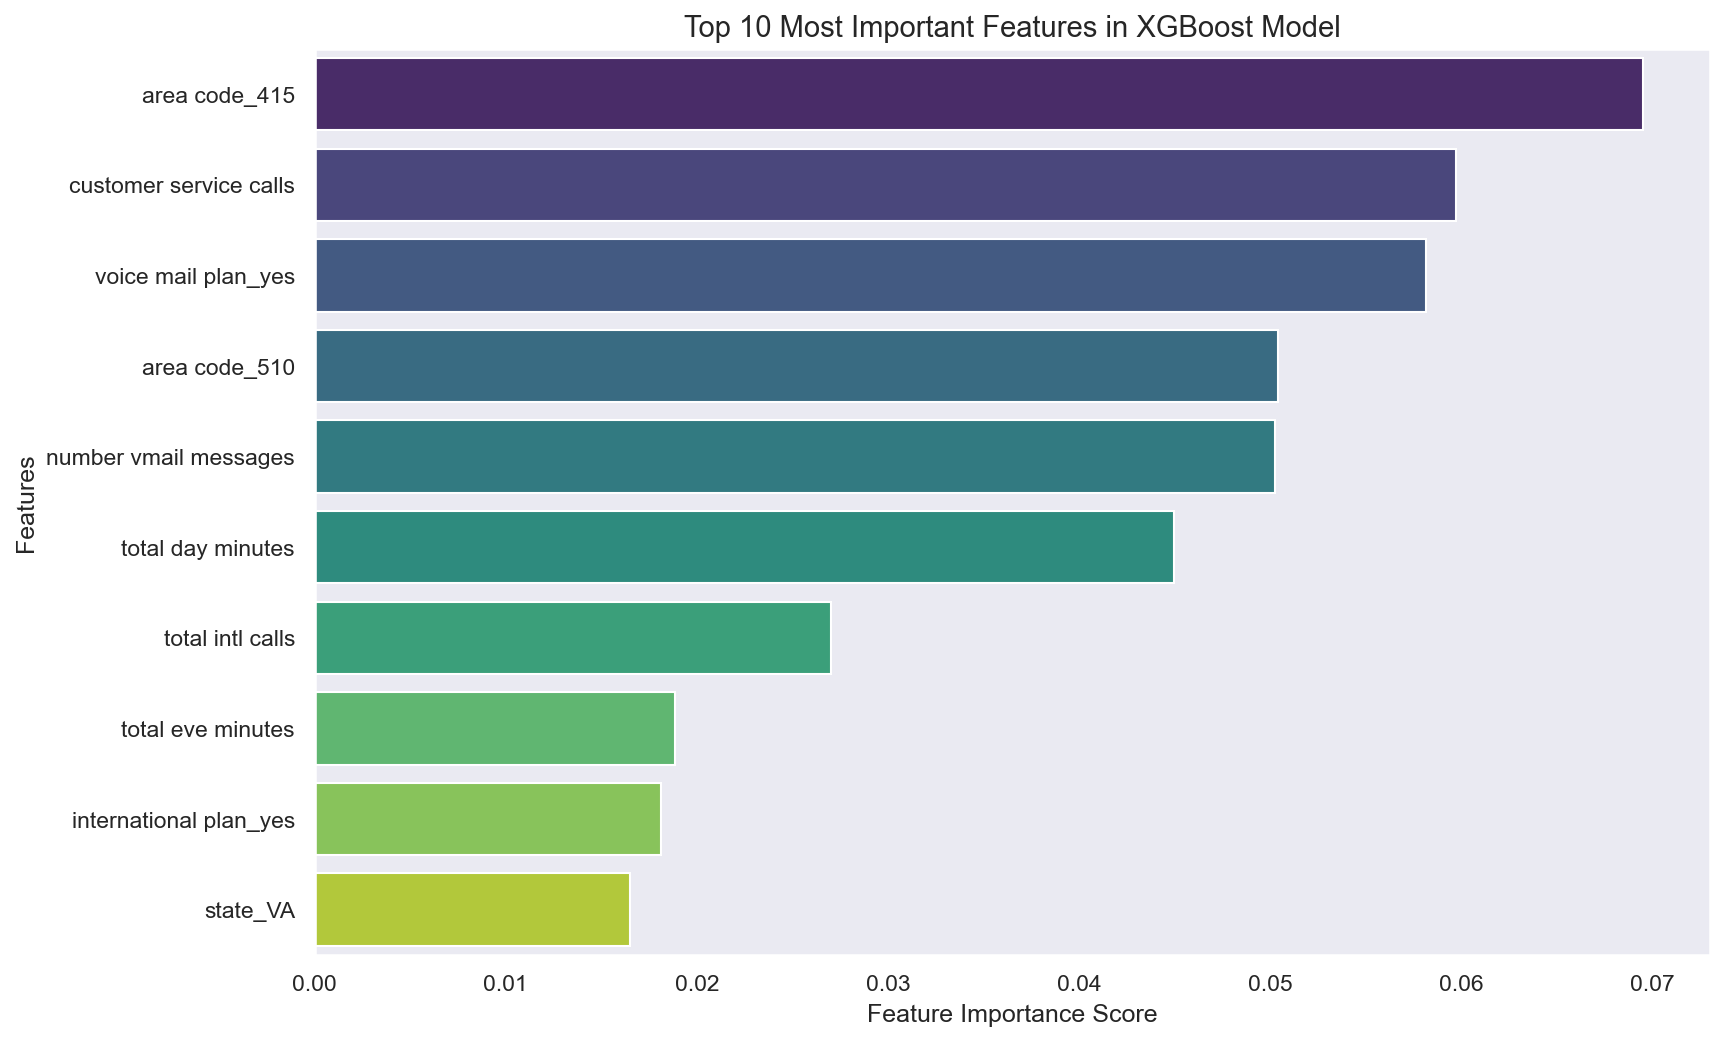

In [113]:

top_n = 10
feature_importances_sorted = sorted(zip(feature_importance, feature_names), reverse=True)
top_features = feature_importances_sorted[:top_n]

sns.set_style("dark")
plt.figure(figsize=(12, 8))
sns.barplot(x=[imp for imp, name in top_features], 
            y=[name for imp, name in top_features], 
            palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title(f'Top {top_n} Most Important Features in XGBoost Model', fontsize=14)
plt.show()


### Feature Importance Insights

The XGBoost model's feature importance analysis yields the following key insights regarding the top 10 features impacting customer churn:

1. **Area Code 415**: This demographic attribute surfaces as the most influential, indicating a particular geographic region's impact on churn likelihood.
2. **Customer Service Calls**: Frequent interactions with customer service are a strong churn predictor, suggesting customer satisfaction issues.
3. **Voice Mail Plan (Yes)**: Enrollment in a voice mail plan appears to correlate with churn, which could reflect customer preferences or plan pricing.
4. **Area Code 510**: Similar to Area Code 415, this feature's importance underscores the role of regional factors in customer retention.
5. **Number of Voice Mail Messages**: The volume of voice mail messages is closely tied to churn, possibly indicating customer engagement levels.
6. **Total Day Minutes**: Daytime usage is a significant churn determinant, likely due to its association with billing and service satisfaction.
7. **Total International Calls**: International calling frequency, while less predictive than other features, still provides churn insight, potentially related to costs or connectivity quality.
8. **Total Evening Minutes**: Evening usage moderately affects churn predictions, hinting at customer lifestyle patterns.
9. **International Plan (Yes)**: Subscription to an international plan is indicative of churn, warranting a review of its value proposition.
10. **State (VA)**: The inclusion of a specific state, Virginia (VA), among top predictors, could suggest regional market competition or service quality issues.

It's essential to interpret these importances in the context of the model's predictive framework, where causality is not implied, merely association.

## Modeling Summary

The project undertook the challenge of customer churn in the telecommunications sector. We applied a systematic approach involving exploratory data analysis, data preprocessing, and advanced machine learning techniques to pinpoint potential churn.

**Discoveries**:

- Exploratory data analysis unveiled critical variable distributions and interdependencies.
- Class imbalance mitigation via SMOTE influenced model performance significantly.
- Our model-building exercise spanned logistic regression, decision trees, and XGBoost classifiers, with meticulous hyperparameter tuning.
- Evaluation metrics revealed the XGBoost classifier's superior performance in accuracy and ROC AUC.

## Conclusion and Strategic Recommendations

Our analysis suggests that a machine learning-based approach is viable for identifying customers at churn risk. The fine-tuned XGBoost model stands out with its predictive proficiency.

**Strategic Actions**:

1. **Implement the XGBoost Model**: Integrate the XGBoost model into operational systems for real-time churn risk monitoring, enabling proactive customer retention.
2. **Enhance Customer Service**: Given the link between service calls and churn, prioritizing customer service improvements could yield significant retention gains.
3. **Reassess Voice Mail Offerings**: Investigate the churn association with voice mail plans and adapt offerings to align with customer expectations.
4. **Update Models Regularly**: Refresh the model periodically with new data to ensure continued relevance and accuracy.
5. **Establish a Feedback Mechanism**: Create a feedback loop that channels insights from model predictions to customer-facing teams, fostering a data-driven retention strategy.
6. **Deepen Data Exploration**: Continue analyzing the dataset to unearth and evaluate other potential churn drivers.

By embracing these recommendations, the telecom company can expect to enhance customer loyalty and strengthen its market position.

In [116]:
import pickle

# File path for the saved model
model_file_path = 'xgb_model.pkl'

# Save the tuned XGBoost model to a file using pickle
with open(model_file_path, 'wb') as model_file:
    pickle.dump(grid_clf, model_file)

print(f"Model successfully saved to {model_file_path}")


Model successfully saved to xgb_model.pkl


## For deployment

In [117]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
with open('xgb_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict(data['features'])
    return jsonify(prediction.tolist())

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

D:\Anacondda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
